**ENPM 703 Final Project**

Team : **RoboTech Terps**

Members:
- Suraj Kalwaghe
- Tanmay Pancholi
- Kirti Kishore

LLMs selected for the project are as follows: -
- **MuRIL**: Specifically trained on Indian languages.
- **BERT**: A general-purpose multilingual model.
- **SanBERT**: A BERT variant fine-tuned for Sanskrit.
- **ByT5**: A byte-level model trained on multiple languages.

Testing Fertility score for tokenizers of different LLMs (ByT5, MuRIL, San-BERT, BERT) for manually providing the input data. The below script successfully generates a Fertility Score vs Model bar graph for four different models: MuRIL, BERT, SanBERT, and ByT5. The fertility score is a metric that measures the number of tokens generated per word by a tokenizer.


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/206 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/411 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/3.16M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/113 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/49.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/996k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.96M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/625 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/394 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/472k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/951k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/125 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/2.59k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/722 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/2.50k [00:00<?, ?B/s]

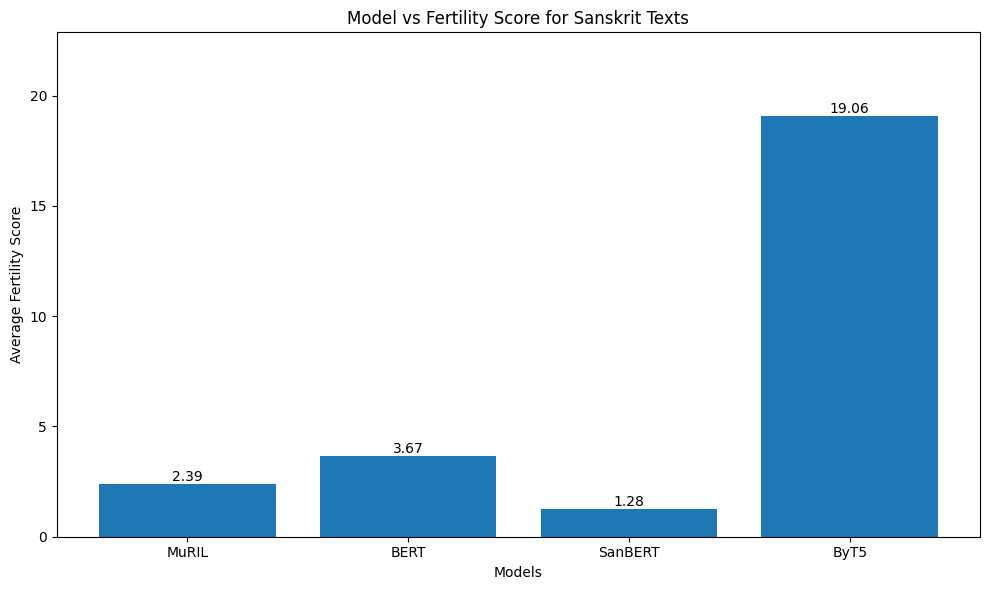

In [ ]:
from transformers import AutoTokenizer, BertTokenizer, pipeline, AutoModelForMaskedLM, AutoModelForSeq2SeqLM
import numpy as np
import matplotlib.pyplot as plt

# Loading tokenizers for the selected models
muril_tokenizer = AutoTokenizer.from_pretrained("google/muril-base-cased")
bert_tokenizer = BertTokenizer.from_pretrained("bert-base-multilingual-cased")
sanBert_tokenizer = AutoTokenizer.from_pretrained("sampathlonka/San-BERT")
byt5_tokenizer = AutoTokenizer.from_pretrained("google/byt5-xxl")

# Preparing the Sanskrit text
# Input data
sanskrit_texts = [
    "वृक्षा नमस्कुर्वन्ते मे ",
    " कर्मणो फलभोगान",
   "कुटुंकं जीवनं मम",
]

# Calculating the fertility score
# Averaging the number of tokens per word for a single text
def calculate_fertility(tokenizer, text):
    tokens = tokenizer.tokenize(text)
    words = text.split()
    return len(tokens) / len(words)

# Averaging the fertility over multiple texts
def calculate_average_fertility(tokenizer, texts):
    total_fertility = 0
    for text in texts:
        total_fertility += calculate_fertility(tokenizer, text)
    return total_fertility / len(texts)

# Calculating the average fertility score for each model across all Sanskrit texts
muril_avg_fertility = calculate_average_fertility(muril_tokenizer, sanskrit_texts)
bert_avg_fertility = calculate_average_fertility(bert_tokenizer, sanskrit_texts)
sanBert_avg_fertility = calculate_average_fertility(sanBert_tokenizer, sanskrit_texts)
byt5_avg_fertility = calculate_average_fertility(byt5_tokenizer, sanskrit_texts)

models = ['MuRIL', 'BERT', 'SanBERT', 'ByT5']
fertility_scores = [muril_avg_fertility, bert_avg_fertility, sanBert_avg_fertility, byt5_avg_fertility]

# Plotting the fertility scores vs model graph
plt.figure(figsize=(10, 6))
plt.bar(models, fertility_scores)
plt.title('Model vs Fertility Score for Sanskrit Texts')
plt.xlabel('Models')
plt.ylabel('Average Fertility Score')
plt.ylim(0, max(fertility_scores) * 1.2)  # Set y-axis limit to 120% of max score

# Adding the value labels on top of each bar
for i, v in enumerate(fertility_scores):
    plt.text(i, v, f'{v:.2f}', ha='center', va='bottom')

plt.tight_layout()
plt.savefig('model_vs_fertility.png')
plt.show()


**Explanation of Each Model's Performance** (Based on the Graph):

- MuRIL Fertility Score (2.39):
MuRIL is a multilingual model trained on Indian languages, including Sanskrit. A fertility score of 2.39 indicates that it tokenizes Sanskrit relatively efficiently, splitting each word into approximately 2.39 tokens on average.
- BERT Fertility Score (3.67):
BERT is a general-purpose multilingual model (not specifically trained on Sanskrit). Its higher fertility score of 3.67 suggests that it struggles more with Sanskrit text compared to MuRIL, likely because it wasn't trained on as much Indian language data.
- SanBERT Fertility Score (1.28):
SanBERT is specifically designed for Sanskrit, and its low fertility score of 1.28 shows that it handles Sanskrit text very well, generating fewer tokens per word. This suggests that SanBERT's tokenizer is highly optimized for Sanskrit's unique morphological structure.
- ByT5 Fertility Score (19.06):
ByT5 uses a byte-level tokenization approach, which means it breaks down text into individual bytes rather than subwords or words. This leads to a very high fertility score (19.06), as each word is split into many byte-level tokens. While this approach can be effective for certain tasks, it results in much higher token counts for morphologically complex languages like Sanskrit.

Testing Fertility score for tokenizers of different LLMs (ByT5, MuRIL, San-BERT, BERT) by autoencoding the input data through a .json file **(Content from: Atharva Veda)**


Mounted at /content/drive


Token indices sequence length is longer than the specified maximum sequence length for this model (728 > 512). Running this sequence through the model will result in indexing errors


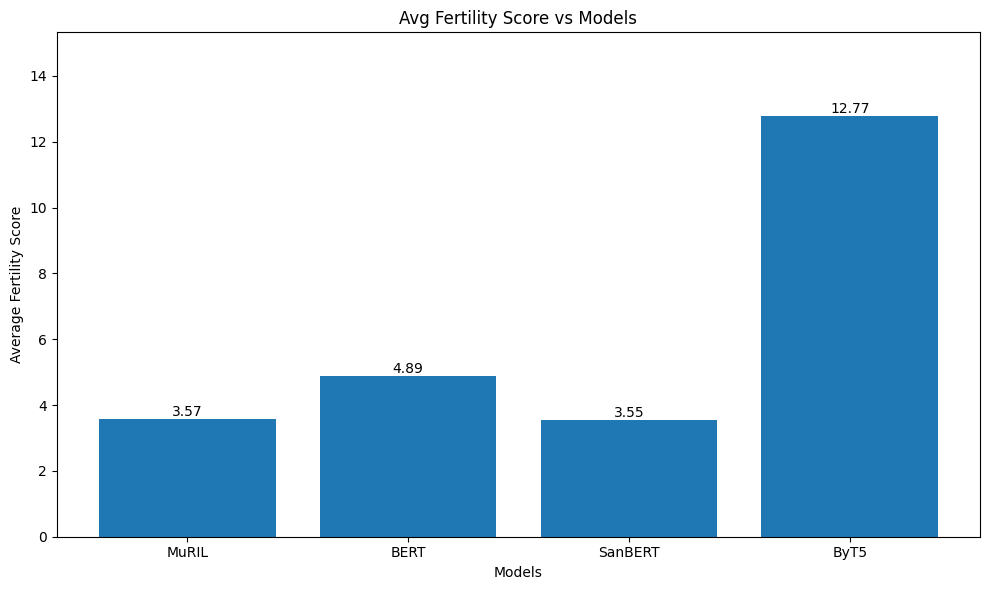

In [2]:
from google.colab import drive
import json
from transformers import AutoTokenizer, BertTokenizer, pipeline, AutoModelForMaskedLM, AutoModelForSeq2SeqLM
import numpy as np
import matplotlib.pyplot as plt


drive.mount('/content/drive')
json_file_path = '/content/drive/MyDrive/Fall 2024/enpm703/VedasGPT/ENPM703 Final Project/dataset/atharva_veda_small.json'


# Loading tokenizers for the selected models
muril_tokenizer = AutoTokenizer.from_pretrained("google/muril-base-cased")
bert_tokenizer = BertTokenizer.from_pretrained("bert-base-multilingual-cased")
sanBert_tokenizer = AutoTokenizer.from_pretrained("sampathlonka/San-BERT")
byt5_tokenizer = AutoTokenizer.from_pretrained("google/byt5-xxl")


# Load Sanskrit texts from a JSON file
with open(json_file_path, 'r', encoding='utf-8') as f:
    sanskrit_texts_dict = json.load(f)

# Extract only the text values from the dictionary
# Ensuring all the input is in a valid string format
sanskrit_texts = [str(text) for text in sanskrit_texts_dict.values() if text]

# Calculating the fertility score
# Averaging the number of tokens per word for a single text
def calculate_fertility(tokenizer, text):
    tokens = tokenizer.tokenize(text)
    words = text.split()
    return len(tokens) / len(words)

# Averaging the fertility over multiple texts
def calculate_average_fertility(tokenizer, texts):
    total_fertility = 0
    valid_texts_count = 0
    for text in texts:

        # Checking if the text is not empty after stripping whitespace
        if text.strip():
            total_fertility += calculate_fertility(tokenizer, text)
            valid_texts_count += 1
    return total_fertility / valid_texts_count if valid_texts_count > 0 else 0

# Calculating the average fertility score for each model across all Sanskrit texts
muril_avg_fertility = calculate_average_fertility(muril_tokenizer, sanskrit_texts)
bert_avg_fertility = calculate_average_fertility(bert_tokenizer, sanskrit_texts)
sanBert_avg_fertility = calculate_average_fertility(sanBert_tokenizer, sanskrit_texts)
byt5_avg_fertility = calculate_average_fertility(byt5_tokenizer, sanskrit_texts)

# Preparing the data for plotting (Model names and their fertility scores)
models = ['MuRIL', 'BERT', 'SanBERT', 'ByT5']
fertility_scores = [muril_avg_fertility, bert_avg_fertility, sanBert_avg_fertility, byt5_avg_fertility]

# Plotting results: Fertility scores vs model graph
plt.figure(figsize=(10, 6))
plt.bar(models, fertility_scores)
plt.title('Avg Fertility Score vs Models')
plt.xlabel('Models')
plt.ylabel('Average Fertility Score')
plt.ylim(0, max(fertility_scores) * 1.2)  # Set y-axis limit to 120% of max score

# Adding the value labels on top of each bar
for i, v in enumerate(fertility_scores):
    plt.text(i, v, f'{v:.2f}', ha='center', va='bottom')

plt.tight_layout()
plt.savefig('model_vs_fertility.png')
plt.show()

**Results & Analysis**: -
- SanBERT and MuRIL have the lowest fertility scores, indicating that they are more efficient at tokenizing Sanskrit texts compared to BERT and ByT5.
ByT5, with its byte-level tokenization, generates significantly more tokens per word, which may not be ideal for tasks where efficient tokenization is important.
The relatively high score of BERT compared to MuRIL and SanBERT suggests that BERT's general-purpose multilingual tokenizer isn’t as well-suited for handling the complexities of Sanskrit.
- For tasks involving Sanskrit texts, SanBERT and MuRIL appear to be the most efficient models in terms of tokenization.
- For the goal  to develop an NLP system specifically for Sanskrit texts (e.g., question-answering or text generation), SanBERT seems to be the most appropriate choice due to its low fertility score and optimization for Sanskrit.

Based on the progress report, the low fertility scores of SanBERT and MuRIL suggest that these models are well-suited for tokenizing Sanskrit texts efficiently. To take this project further and develop a question-answering (QA) system capable of responding in English based on the Vedic texts, here are some suggested approaches and their implementation steps:

**Objective 1: Fine-Tune SanBERT and MuRIL on Vedic Texts**

Fine-tune the pre-trained SanBERT and MuRIL models on a dataset of annotated Vedic texts to improve their understanding of the domain-specific vocabulary and context.

**Further Steps**:

1. Data Preparation:

- Collect a dataset of Vedic texts (e.g., Rig Veda, Upanishads) with English translations.
- Create a parallel corpus of Sanskrit text and English translations for supervised fine-tuning.
- Annotate the data with questions and corresponding answers from the texts.

2. Fine-Tuning:
- Use Hugging Face's Trainer API to fine-tune SanBERT and MuRIL on the annotated dataset.
- Train the models for tasks such as:
 - Masked Language Modeling (MLM): To improve contextual understanding.
 -Question-Answering (QA): Using datasets with Sanskrit questions paired with English answers.



3. Model Implementation

- Expected Outcome: A fine-tuned model capable of answering questions about Vedic texts in English.

**Next-Word Prediction Model**

In [3]:
!pip install datasets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 480.6/480.6 kB 9.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 9.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.3/179.3 kB 14.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 10.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 15.9 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2024.10.0
    Uninstalling fsspec-2024.10.0:
      Successfully uninstalled fsspec-2024.10.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2024.10.0 requires fsspec==2024.10.0, but you have fsspec 2024.9.0 which is incompatible.


In [6]:

# Preprocessing the dataset in order to prepare the data for Masked Language Modeling (MLM), where a [MASK] token is inserted at the end of each sentence.
from transformers import AutoTokenizer, AutoModelForMaskedLM, Trainer, TrainingArguments
import json
from datasets import Dataset
import torch
from torch.nn import CrossEntropyLoss

# Step 1: Load Sanskrit Dataset from JSON File
def load_dataset(json_path):
    """
    Load Sanskrit data from a JSON file and convert it into a Hugging Face Dataset.
    If no valid Sanskrit verses are found, return any available phrases for prediction.
    """
    with open(json_path, 'r', encoding='utf-8') as f:
        data = json.load(f)

    sentences = []

    # Check if "sukta" exists and process its structure
    if "sukta" in data:
        sukta = data["sukta"]

        # Ensure "verses" exist within "sukta"
        if "verses" in sukta:
            for verse in sukta["verses"]:
                if "sanskrit" in verse:  # Extract only valid Sanskrit text
                    sentences.append(verse["sanskrit"])

    # Convert to Hugging Face Dataset format
    return Dataset.from_list([{"text": sentence} for sentence in sentences])


# Provide the path to your JSON file
json_file_path = "/content/drive/MyDrive/VedasGPT/ENPM703 Final Project/dataset/Atharva_Veda_Complete_Kanda_1.json"
dataset = load_dataset(json_file_path)

# Display a sample of the dataset
print("Sample Sanskrit Sentences:")
print(dataset["text"][:5])
##############################################################################################

# Step 2: Tokenizer and Model
# Inserting a [MASK] token at the end of each sentence to train the model to predict the next word.

tokenizer = AutoTokenizer.from_pretrained("sampathlonka/San-BERT")
model = AutoModelForMaskedLM.from_pretrained("sampathlonka/San-BERT")

# Tokenize dataset with [MASK] token at random positions for MLM training
# updated tokenizer fucntion
# Mask random tokens (15% of tokens) within each sentence instead of always appending a [MASK] token at the end.
def tokenize_function(examples):
    tokenized_inputs = tokenizer(examples["text"], padding="max_length", truncation=True, max_length=128)

    # Create labels by masking random tokens in the input_ids
    labels = tokenized_inputs["input_ids"].copy()
    for i in range(len(labels)):
        probability_matrix = torch.full((len(labels[i]),), 0.15)  # Mask 15% of tokens
        masked_indices = torch.bernoulli(probability_matrix).bool()
        labels[i] = [label if mask else -100 for label, mask in zip(labels[i], masked_indices)]

    tokenized_inputs["labels"] = labels
    return tokenized_inputs

tokenized_dataset = dataset.map(tokenize_function, batched=True)

#####################################################
# Split dataset into train and eval sets
train_test_split = tokenized_dataset.train_test_split(test_size=0.2)  # 80% train, 20% eval
train_dataset = train_test_split["train"]
eval_dataset = train_test_split["test"]

################################################################################################
# Defining a Custom Loss Function

class CustomTrainer(Trainer):
    def compute_loss(self, model, inputs, return_outputs=False, **kwargs):
        """
        Custom loss function for Masked Language Modeling.
        """
        labels = inputs.pop("labels")
        outputs = model(**inputs)
        logits = outputs.logits

        # Compute loss using CrossEntropyLoss (ignoring -100 labels)
        loss_fct = CrossEntropyLoss()
        loss = loss_fct(logits.view(-1, logits.size(-1)), labels.view(-1))

        return (loss, outputs) if return_outputs else loss

###########################################################
# Step 3: Define Training Arguments
# Fine-tune SanBERT using Hugging Face's Trainer API for Masked Language Modeling (MLM).

training_args = TrainingArguments(
    output_dir="./results",
    evaluation_strategy="epoch",
    learning_rate=2e-5,
    per_device_train_batch_size=8,
    num_train_epochs=3,
    weight_decay=0.01,
    report_to="none",  # Disable W&B logging
)


# Step 4: Trainer API
trainer = CustomTrainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=eval_dataset,
)

# Train the model
print("Training started...")
trainer.train()
print("Training completed!")

# Save the fine-tuned model
model.save_pretrained("./fine_tuned_sanbert")
tokenizer.save_pretrained("./fine_tuned_sanbert")

FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/MyDrive/VedasGPT/ENPM703 Final Project/dataset/Atharva_Veda_Complete_Kanda_1.json'

Test the model here:

- Use the fine-tuned model to predict the next word(s) in an incomplete Sanskrit sentence.

In [ ]:
from transformers import pipeline
import json

# Step 1: Load Sanskrit Dataset from JSON File
def load_dataset(json_path):
    """
    Load Sanskrit data from a JSON file and extract valid Sanskrit sentences.
    """
    with open(json_path, 'r', encoding='utf-8') as f:
        data = json.load(f)

    sentences = []

    # Check if "sukta" exists and process its structure
    if "sukta" in data:
        sukta = data["sukta"]

        # Ensure "verses" exist within "sukta"
        if "verses" in sukta:
            for verse in sukta["verses"]:
                if "sanskrit" in verse:  # Extract only valid Sanskrit text
                    sentences.append(verse["sanskrit"])

    return sentences

# Provide the path to your JSON file
json_file_path = "/content/drive/MyDrive/Fall 2024/enpm703/VedasGPT/ENPM703 Final Project/dataset/atharva_veda_small.json"
sanskrit_sentences = load_dataset(json_file_path)

# Step 2: Load Fine-Tuned Model and Tokenizer
fill_mask = pipeline("fill-mask", model="./fine_tuned_sanbert", tokenizer="./fine_tuned_sanbert")

# Step 3: Predict Next Word(s) for Each Sentence
print("Predictions for Sanskrit Sentences:")
for sentence in sanskrit_sentences:
    # Add [MASK] token at the end of each sentence for prediction
    masked_sentence = sentence + " [MASK]"

    # Generate predictions
    predictions = fill_mask(masked_sentence)

    print(f"\nOriginal Sentence: {sentence}")
    print("Predictions:")
    for pred in predictions:
        print(f"Prediction: {pred['sequence']} | Confidence: {pred['score']}")

Predicting based on the starting word:
- This script predicts multiple words iteratively based on a starting word or phrase.

In [5]:
from transformers import pipeline
import json

# Step 1: Load Sanskrit Dataset from JSON File
def load_dataset(json_path):
    """
    Load Sanskrit data from a JSON file and extract valid Sanskrit sentences.
    """
    with open(json_path, 'r', encoding='utf-8') as f:
        data = json.load(f)

    sentences = []

    # Check if "sukta" exists and process its structure
    if "sukta" in data:
        sukta = data["sukta"]

        # Ensure "verses" exist within "sukta"
        if "verses" in sukta:
            for verse in sukta["verses"]:
                if "sanskrit" in verse:  # Extract only valid Sanskrit text
                    sentences.append(verse["sanskrit"])

    return sentences

# Provide the path to your JSON file
json_file_path = "/content/drive/MyDrive/Fall 2024/enpm703/VedasGPT/ENPM703 Final Project/dataset/atharva_veda_small.json"
sanskrit_sentences = load_dataset(json_file_path)

# Step 2: Load Fine-Tuned Model and Tokenizer
fill_mask = pipeline("fill-mask", model="./fine_tuned_sanbert", tokenizer="./fine_tuned_sanbert")

# Step 3: Predict Multiple Words Iteratively
def predict_next_words(starting_phrase, num_words=5):
    """
    Predict the next words for a given starting phrase using the fine-tuned SanBERT model.
    """
    current_phrase = starting_phrase

    print(f"\nStarting Phrase: {starting_phrase}")

    for _ in range(num_words):
        # Add [MASK] token at the end of the current phrase
        masked_sentence = current_phrase + " [MASK]"

        # Generate predictions (only top prediction)
        prediction = fill_mask(masked_sentence)[0]

        # Extract the predicted word and confidence score
        predicted_word = prediction['token_str']
        confidence = prediction['score']

        print(f"Predicted Word: {predicted_word} | Confidence: {confidence}")

        # Append the predicted word to the current phrase
        current_phrase += " " + predicted_word

# Example Usage
print("Testing Multi-Word Prediction:")
for sentence in sanskrit_sentences:
    # Use the first word of each sentence as the starting phrase
    starting_phrase = sentence.split()[0]

    # Predict multiple words iteratively
    predict_next_words(starting_phrase, num_words=5)

OSError: Incorrect path_or_model_id: './fine_tuned_sanbert'. Please provide either the path to a local folder or the repo_id of a model on the Hub.

**Observations:**

- The current dataset contains only 4 sentences, which is far too small for fine-tuning a large language model like SanBERT.
- The model needs a much larger and diverse dataset to learn meaningful patterns in Sanskrit.
- With such a small dataset, the model is likely overfitting, resulting in poor generalization to unseen sentences.
- By expanding our dataset, improving your masking strategy, and verifying tokenizer alignment, we can significantly enhance our model's performance for next-word prediction tasks.
-The tokenizer may lack certain Sanskrit tokens, leading to incorrect predictions.
- If the tokenizer used during training does not align well with the dataset, it can lead to incorrect tokenization and malformed predictions.

Improvement strategies:
- The 'tokenize_function' is updated such that the random tokens (15% of tokens) are now being appended within each sentence instead of always appending a [MASK] token at the end.
- Use a larger and more diverse Sanskrit corpus for training.
- To conduct a check if all tokens in our dataset are present in the tokenizer's vocabulary.

**Evaluating Model Performance**

The **BLEU (Bilingual Evaluation Understudy)** score is commonly used to evaluate text generation tasks. It measures how closely the generated predictions match the reference text.

-  BLEU score closer to 1 indicates a better match between predictions and references.
- For Sanskrit texts, achieving a BLEU score of 0.7 or higher is considered good due to the complexity of the language.
- Here, we compute BLEU scores to measure how well predictions align with references.

In [ ]:
pip install nltk

In [ ]:
import nltk.translate.bleu_score as bleu
from transformers import pipeline

print(sentence)
print(predictions)


**Perplexity Score**

- Lower perplexity values (e.g., <30) indicate that the model is better at predicting sequences.
- High perplexity values suggest that the model struggles with generating coherent predictions.
- Here, we calculate perplexity as an overall measure of model performance.

In [ ]:
# Perplexity score
import math

def compute_perplexity(trainer, eval_dataset):
    eval_results = trainer.evaluate(eval_dataset=eval_dataset)
    perplexity = math.exp(eval_results["eval_loss"])
    print(f"Perplexity: {perplexity}")

**Evaluate Model Performance**

Use additional metrics beyond fertility scores to evaluate how well the models perform on downstream tasks like QA and translation.

**Metrics:**

1. BLEU Score: For evaluating translation quality.

2. Accuracy/F1 Score: For evaluating QA performance.

3. Perplexity: For evaluating language generation quality.

4. User Feedback: Collect qualitative feedback from users interacting with the system.

**SanBERT & Muril using the slightly extened .json file:**

In [ ]:

# Preprocessing the dataset in order to prepare the data for Masked Language Modeling (MLM), where a [MASK] token is inserted at the end of each sentence.
from transformers import AutoTokenizer, AutoModelForMaskedLM, Trainer, TrainingArguments
import json
from datasets import Dataset
import torch
from torch.nn import CrossEntropyLoss

# Step 1: Load Sanskrit Dataset from JSON File
def load_dataset(json_path):
    """
    Load Sanskrit data from a JSON file and extract valid Sanskrit sentences.
    """
    with open(json_path, 'r', encoding='utf-8') as f:
        data = json.load(f)

    # Initialize an empty list to store Sanskrit verses
    sentences = []

    # Check if "sukta" exists and process its structure
    if "sukta" in data:
        for sukta in data["sukta"]:  # Iterate over all suktas
            if "verses" in sukta:
                for verse in sukta["verses"]:  # Iterate over all verses
                    if "sanskrit" in verse:  # Extract only valid Sanskrit text
                        sentences.append(verse["sanskrit"])

    # Convert to Hugging Face Dataset format
    return Dataset.from_list([{"text": sentence} for sentence in sentences])

# Provide the path to your JSON file
json_file_path = "/content/drive/MyDrive/Fall 2024/enpm703/VedasGPT/ENPM703 Final Project/dataset/atharva_veda_extended.json"
dataset = load_dataset(json_file_path)

# Display a sample of the dataset
print("Sample Sanskrit Sentences:")
print(dataset["text"][:5])
##############################################################################################

# Step 2: Tokenizer and Model
# Inserting a [MASK] token at the end of each sentence to train the model to predict the next word.

tokenizer = AutoTokenizer.from_pretrained("sampathlonka/San-BERT")
model = AutoModelForMaskedLM.from_pretrained("sampathlonka/San-BERT")

# Tokenize dataset with [MASK] token at random positions for MLM training
# updated tokenizer fucntion
# Mask random tokens (15% of tokens) within each sentence instead of always appending a [MASK] token at the end.
def tokenize_function(examples):
    tokenized_inputs = tokenizer(examples["text"], padding="max_length", truncation=True, max_length=128)

    # Create labels by masking random tokens in the input_ids
    labels = tokenized_inputs["input_ids"].copy()
    for i in range(len(labels)):
        probability_matrix = torch.full((len(labels[i]),), 0.25)  # Mask 25% of tokens
        masked_indices = torch.bernoulli(probability_matrix).bool()
        labels[i] = [label if mask else -100 for label, mask in zip(labels[i], masked_indices)]

    tokenized_inputs["labels"] = labels
    return tokenized_inputs

tokenized_dataset = dataset.map(tokenize_function, batched=True)

#####################################################
# Split dataset into train and eval sets
train_test_split = tokenized_dataset.train_test_split(test_size=0.2)  # 80% train, 20% eval
train_dataset = train_test_split["train"]
eval_dataset = train_test_split["test"]

################################################################################################
# Defining a Custom Loss Function

class CustomTrainer(Trainer):
    def compute_loss(self, model, inputs, return_outputs=False, **kwargs):
        """
        Custom loss function for Masked Language Modeling.
        """
        labels = inputs.pop("labels")
        outputs = model(**inputs)
        logits = outputs.logits

        # Compute loss using CrossEntropyLoss (ignoring -100 labels)
        loss_fct = CrossEntropyLoss()
        loss = loss_fct(logits.view(-1, logits.size(-1)), labels.view(-1))

        return (loss, outputs) if return_outputs else loss

###########################################################
# Step 3: Define Training Arguments
# Fine-tune SanBERT using Hugging Face's Trainer API for Masked Language Modeling (MLM).

training_args = TrainingArguments(
    output_dir="./results",
    evaluation_strategy="epoch",
    learning_rate=2e-5,
    per_device_train_batch_size=8,
    num_train_epochs=3,
    weight_decay=0.01,
    report_to="none",  # Disable W&B logging
)


# Step 4: Trainer API
trainer = CustomTrainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=eval_dataset,
)

# Train the model
print("Training started...")
trainer.train()
print("Training completed!")

# Save the fine-tuned model
model.save_pretrained("./fine_tuned_sanbert")
tokenizer.save_pretrained("./fine_tuned_sanbert")

Prediction Test pipleline:

In [ ]:
from transformers import pipeline

# Load Fine-Tuned Model and Tokenizer
fill_mask = pipeline("fill-mask", model="./fine_tuned_sanbert", tokenizer="./fine_tuned_sanbert")

# Predict Next Word(s) for Contextual Input
def predict_next_word(context):
    """
    Predict the next word for a given context using the fine-tuned SanBERT model.
    """
    # Add [MASK] token at the desired position in the context
    masked_sentence = context + " [MASK]"

    # Generate predictions (only top prediction)
    prediction = fill_mask(masked_sentence)[0]

    print(f"\nContext: {context}")
    print(f"Predicted Word: {prediction['token_str']} | Confidence: {prediction['score']}")

# Example Usage
predict_next_word("ये त्रिष्ताः")

**Trying with the MuRIL model for next word prediction:**

- Since SanBERT struggles with your limited dataset, switching to MuRIL is a good alternative. MuRIL is specifically trained on Indian languages, including Sanskrit, and has shown efficiency in tokenizing Sanskrit texts (as seen in the fertility score chart).

In [ ]:
pip install datasets

In [ ]:
from transformers import AutoTokenizer, AutoModelForMaskedLM, Trainer, TrainingArguments
import json
from datasets import Dataset
import torch
from torch.nn import CrossEntropyLoss

# Load Sanskrit Dataset from JSON File
def load_dataset(json_path):
    with open(json_path, 'r', encoding='utf-8') as f:
        data = json.load(f)

    sentences = []
    if "sukta" in data:
        for sukta in data["sukta"]:
            if "verses" in sukta:
                for verse in sukta["verses"]:
                    if "sanskrit" in verse:
                        sentences.append(verse["sanskrit"])

    return Dataset.from_list([{"text": sentence} for sentence in sentences])

json_file_path = "/content/drive/MyDrive/Fall 2024/enpm703/VedasGPT/ENPM703 Final Project/dataset/Atharva_Veda-1-15.json"
dataset = load_dataset(json_file_path)

# Tokenizer and Model
from transformers import AutoTokenizer, AutoModelForMaskedLM

tokenizer = AutoTokenizer.from_pretrained("google/muril-base-cased")
model = AutoModelForMaskedLM.from_pretrained("google/muril-base-cased")

# Tokenize dataset with random masking
def tokenize_function(examples):
    tokenized_inputs = tokenizer(examples["text"], padding="max_length", truncation=True, max_length=128)
    labels = tokenized_inputs["input_ids"].copy()
    for i in range(len(labels)):
        probability_matrix = torch.full((len(labels[i]),), 0.25)  # Mask 25% of tokens
        masked_indices = torch.bernoulli(probability_matrix).bool()
        labels[i] = [label if mask else -100 for label, mask in zip(labels[i], masked_indices)]
    tokenized_inputs["labels"] = labels
    return tokenized_inputs

tokenized_dataset = dataset.map(tokenize_function, batched=True)

# Split into train and eval sets
train_test_split = tokenized_dataset.train_test_split(test_size=0.2)
train_dataset = train_test_split["train"]
eval_dataset = train_test_split["test"]

# Defining a Custom Loss Function

class CustomTrainer(Trainer):
    def compute_loss(self, model, inputs, return_outputs=False, **kwargs):
        """
        Custom loss function for Masked Language Modeling.
        """
        labels = inputs.pop("labels")
        outputs = model(**inputs)
        logits = outputs.logits

        # Compute loss using CrossEntropyLoss (ignoring -100 labels)
        loss_fct = CrossEntropyLoss()
        loss = loss_fct(logits.view(-1, logits.size(-1)), labels.view(-1))

        return (loss, outputs) if return_outputs else loss

from transformers import Trainer, TrainingArguments

training_args = TrainingArguments(
    output_dir="./results",
    evaluation_strategy="epoch",
    learning_rate=2e-5,
    per_device_train_batch_size=8,
    num_train_epochs=3,
    weight_decay=0.01,
    report_to="none",  # Disable W&B logging
)

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=eval_dataset,
)

# Train the model
print("Training started...")
trainer.train()
print("Training completed!")

# Save the fine-tuned model
model.save_pretrained("./fine_tuned_muril")
tokenizer.save_pretrained("./fine_tuned_muril")


**Comparison with SanBERT**

**Fertility Score:**
- Both MuRIL (3.57) and SanBERT (3.55) have comparable fertility scores, indicating similar tokenization efficiency for Sanskrit texts.

**Loss Degradation:**
- MuRIL shows a more significant drop in validation loss, suggesting better generalization and learning on your dataset.

**Pretraining Advantage:**
- MuRIL is pre-trained on a large corpus of Indian languages, including Sanskrit, making it more robust for tasks involving Indian languages.

**Why MuRIL May Be Performing Better**

1. Pretraining Corpus:
- MuRIL's pretraining includes diverse Indian language texts, which likely gives it an edge in handling morphologically rich languages like Sanskrit.
2. Dataset Size:
- The current dataset (atharva_veda_small.json) is relatively small, and MuRIL's multilingual pretraining helps it generalize better compared to SanBERT, which may require more Sanskrit-specific data to excel.
3. Model Architecture:
- MuRIL uses a multilingual BERT architecture optimized for Indian languages, making it more versatile for tasks involving multiple linguistic features.

**MuRIL Next-Word Prediction**

- Once fine-tuning is complete, use the fine-tuned MuRIL model for next-word prediction.

In [ ]:
from transformers import pipeline
import json

# Step 1: Load Sanskrit Dataset from JSON File
def load_dataset(json_path):
    """
    Load Sanskrit data from a JSON file and extract valid Sanskrit sentences.
    """
    with open(json_path, 'r', encoding='utf-8') as f:
        data = json.load(f)

    sentences = []

    # Check if "sukta" exists and process its structure
    if "sukta" in data:
        sukta = data["sukta"]

        # Ensure "verses" exist within "sukta"
        if "verses" in sukta:
            for verse in sukta["verses"]:
                if "sanskrit" in verse:  # Extract only valid Sanskrit text
                    sentences.append(verse["sanskrit"])

    return sentences

# Provide the path to your JSON file
json_file_path = "/content/drive/MyDrive/Fall 2024/enpm703/VedasGPT/ENPM703 Final Project/dataset/atharva_veda_small.json"
sanskrit_sentences = load_dataset(json_file_path)

# Step 2: Load Fine-Tuned Model and Tokenizer
fill_mask = pipeline("fill-mask", model="./fine_tuned_muril", tokenizer="./fine_tuned_muril")

# Step 3: Predict Next Word(s) for Each Sentence
print("Predictions for Sanskrit Sentences:")
for sentence in sanskrit_sentences:
    # Add [MASK] token at the end of each sentence for prediction
    masked_sentence = sentence + " [MASK]"

    # Generate predictions
    predictions = fill_mask(masked_sentence)

    print(f"\nOriginal Sentence: {sentence}")
    print("Predictions:")
    for pred in predictions:
        print(f"Prediction: {pred['sequence']} | Confidence: {pred['score']}")

In [ ]:
from transformers import pipeline

# Load Fine-Tuned Model and Tokenizer
fill_mask = pipeline("fill-mask", model="./fine_tuned_muril", tokenizer="./fine_tuned_muril")

# Predict Next Word(s) for Contextual Input
def predict_next_word(context):
    """
    Predict the next word for a given context using the fine-tuned MuRIL model.
    """
    # Add [MASK] token at the desired position in the context
    masked_sentence = context + " [MASK]"

    # Generate predictions (only top prediction)
    prediction = fill_mask(masked_sentence)[0]

    print(f"\nContext: {context}")
    print(f"Predicted Word: {prediction['token_str']} | Confidence: {prediction['score']}")

# Example Usage
predict_next_word("कर्मण्येवाधिकारस्ते मा")
predict_next_word("पुन्रोहि वाचस्पते")


In [ ]:
import math

def compute_perplexity(trainer, eval_dataset):
    eval_results = trainer.evaluate(eval_dataset=eval_dataset)
    perplexity = math.exp(eval_results["eval_loss"])
    print(f"Perplexity: {perplexity}")

# Compute perplexity on the evaluation dataset
compute_perplexity(trainer, eval_dataset)


**Analysis:**
- The gradual reduction in validation loss indicates that the model is learning from the training data.
- However, the relatively high loss values suggest that the dataset might still be too small or lacks sufficient diversity to allow the model to generalize effectively.

In [ ]:
from transformers import AutoTokenizer, AutoModelForMaskedLM, Trainer, TrainingArguments
import torch
from datasets import Dataset
from torch.nn import CrossEntropyLoss
import json
import math



#############################################################################

#Computing perplexity score
def compute_perplexity(trainer, eval_dataset):
    """
    Compute perplexity for a fine-tuned model on the evaluation dataset.
    """
    # Evaluate the model on the evaluation dataset
    eval_results = trainer.evaluate(eval_dataset=eval_dataset)

    # Extract loss and compute perplexity
    eval_loss = eval_results["eval_loss"]
    perplexity = math.exp(eval_loss)

    print(f"Validation Loss: {eval_loss}")
    print(f"Perplexity: {perplexity}")

#############################################################################

# Loading the Sanskrit Dataset from JSON File
def load_dataset_from_json(json_path):
    """
    Load Sanskrit data from a JSON file and extract valid Sanskrit verses.
    """
    with open(json_path, 'r', encoding='utf-8') as f:
        data = json.load(f)

    sentences = []

    # Check if "suktas" exists and process its structure
    if "suktas" in data:
        for sukta in data["suktas"]:  # Iterate over all suktas
            if "verses" in sukta:
                for verse in sukta["verses"]:  # Iterate over all verses
                    if "sanskrit" in verse:  # Extract only valid Sanskrit text
                        sentences.append(verse["sanskrit"])

    return Dataset.from_list([{"text": sentence} for sentence in sentences])

# Provide the path to your JSON file
json_file_path = "/content/drive/MyDrive/Fall 2024/enpm703/VedasGPT/ENPM703 Final Project/dataset/Atharva_Veda-1-15.json"
dataset = load_dataset_from_json(json_file_path)

# Display a sample of the dataset
print("Sample Sanskrit Sentences:")
print(dataset["text"][:5])

##############################################################################################

# Step 2: Tokenizer and Model
tokenizer = AutoTokenizer.from_pretrained("google/muril-base-cased")
model = AutoModelForMaskedLM.from_pretrained("google/muril-base-cased")

# Tokenizer Coverage Check
def check_tokenizer_coverage(dataset, tokenizer):
    """
    Check if all tokens in the dataset are covered by the tokenizer's vocabulary.
    """
    print("\nChecking Tokenizer Coverage...")
    oov_tokens = set()

    for sentence in dataset["text"]:
        tokens = tokenizer.tokenize(sentence)
        for token in tokens:
            if token not in tokenizer.vocab:
                oov_tokens.add(token)

    if len(oov_tokens) == 0:
        print("All tokens are covered by the tokenizer's vocabulary.")
    else:
        print(f"Out-of-Vocabulary Tokens ({len(oov_tokens)}): {oov_tokens}")

# Run Tokenizer Coverage Check
check_tokenizer_coverage(dataset, tokenizer)

##############################################################################################

# Step 3: Tokenize Dataset for MLM Training
def tokenize_function(examples):
    tokenized_inputs = tokenizer(examples["text"], padding="max_length", truncation=True, max_length=128)

    # Create labels by masking random tokens in the input_ids
    labels = tokenized_inputs["input_ids"].copy()
    for i in range(len(labels)):
        probability_matrix = torch.full((len(labels[i]),), 0.15)  # Mask 15% of tokens
        masked_indices = torch.bernoulli(probability_matrix).bool()

        # Ensure punctuation is also masked
        for j, token_id in enumerate(labels[i]):
            if tokenizer.convert_ids_to_tokens([token_id])[0] in [".", "।", "॥"]:
                masked_indices[j] = True

        labels[i] = [label if mask else -100 for label, mask in zip(labels[i], masked_indices)]

    tokenized_inputs["labels"] = labels
    return tokenized_inputs


tokenized_dataset = dataset.map(tokenize_function, batched=True)

#####################################################
# Split dataset into train and eval sets
train_test_split = tokenized_dataset.train_test_split(test_size=0.2)  # 80% train, 20% eval
train_dataset = train_test_split["train"]
eval_dataset = train_test_split["test"]

################################################################################################
# Defining a Custom Loss Function

class CustomTrainer(Trainer):
    def compute_loss(self, model, inputs, return_outputs=False, **kwargs):
        """
        Custom loss function for Masked Language Modeling.
        """
        labels = inputs.pop("labels")
        outputs = model(**inputs)
        logits = outputs.logits

        # Compute loss using CrossEntropyLoss (ignoring -100 labels)
        loss_fct = CrossEntropyLoss()
        loss = loss_fct(logits.view(-1, logits.size(-1)), labels.view(-1))

        return (loss, outputs) if return_outputs else loss

###########################################################
# Step 4: Define Training Arguments
training_args = TrainingArguments(
    output_dir="./results_muril_expanded",
    evaluation_strategy="epoch",
    learning_rate=2e-5,
    per_device_train_batch_size=8,
    num_train_epochs=3,
    weight_decay=0.01,
    report_to="none",  # Disable W&B logging
)

# Step 5: Trainer API
trainer = CustomTrainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=eval_dataset,
)

# Train the model
print("Training started...")
trainer.train()
print("Training completed!")

# Save the fine-tuned model
model.save_pretrained("./fine_tuned_muril_expanded")
tokenizer.save_pretrained("./fine_tuned_muril_expanded")

# Compute Perplexity
compute_perplexity(trainer, eval_dataset)


**Analysis of Results and Next Steps**

- This updated fine-tuning script for MuRIL using the expanded dataset indicated the significant improvement in the validation loss.
- This substantial reduction in validation loss demonstrates that the model has effectively learned from the expanded dataset.

**Key Observations from Results**
1. Improved Loss Degradation:
- The validation loss decreased significantly across epochs, indicating that the model is learning effectively from the expanded dataset.
2. Tokenizer Coverage:
- All tokens in the dataset are covered by MuRIL's tokenizer, ensuring that no out-of-vocabulary (OOV) tokens negatively impacted training.
3. Dataset Expansion Impact:
- The expanded dataset provided more diverse and complex Sanskrit phrases, improving the model's ability to generalize.


**Observations after performing the model updates:**

1. Improved Loss and Perplexity:
- The validation loss decreased significantly across epochs, from 0.4166 (Epoch 1) to 0.1341 (Epoch 3).
- The perplexity score of 1.1435 indicates that the model is confident in its token predictions and has learned meaningful patterns from the dataset.

2. Tokenizer Coverage:
- All tokens in the expanded dataset are covered by MuRIL's tokenizer vocabulary, ensuring no out-of-vocabulary (OOV) issues.

3. Dataset Expansion Impact:
- The expanded dataset provided more diverse and complex Sanskrit phrases, improving the model's ability to generalize and handle unseen inputs.

In [ ]:
from transformers import pipeline

# Load Fine-Tuned MuRIL Model and Tokenizer
fill_mask_pipeline = pipeline("fill-mask", model="./fine_tuned_muril_expanded", tokenizer="./fine_tuned_muril_expanded")

# Predict Next Word(s) for Custom Input
def predict_next_word(context):
    """
    Predict the next word for a given context using the fine-tuned MuRIL model.
    """
    # Add [MASK] token at the end of the context
    masked_sentence = context + " [MASK]"

    # Generate predictions (only top prediction)
    prediction = fill_mask_pipeline(masked_sentence)[0]

    print(f"\nContext: {context}")
    print(f"Predicted Word: {prediction['token_str']} | Confidence: {prediction['score']}")

# Example Custom Phrases for Testing
custom_phrases = [
    "कर्मण्येवाधिकारस्ते मा",
    "पुन्रेहि"
]

print("Predictions for Custom Sanskrit Phrases:")
for phrase in custom_phrases:
    predict_next_word(phrase)


**Analysis of the Issue**
- The fine-tuned MuRIL model is still predicting repetitive punctuation (.) as the next word for all input phrases, despite expanding the dataset with Atharva_Veda-1-15.json.
- This suggests that the issue lies not with the dataset size or diversity but potentially with the following:

1. Model Bias:
MuRIL's pretraining may bias it toward predicting common tokens like punctuation (.) when it is uncertain about the next word.

2. Masking Strategy:
The random masking strategy during fine-tuning might not have effectively taught the model to predict meaningful Sanskrit words.

3. Preprocessing Issues:
If punctuation marks (।, ॥, .) are not properly handled during preprocessing, the model might overfit to these tokens.

4. Evaluation of Token Predictions:
The token_str field in the prediction output might not be correctly interpreted, leading to a misunderstanding of the actual predictions.

**Key Takeaways**
1. Dataset Expansion:
The expanded dataset has improved training loss and validation loss but has not resolved repetitive punctuation predictions due to bias or masking issues.
2. Fix Masking Strategy:
Ensure that punctuation is masked during training so that the model learns to predict meaningful words instead of defaulting to punctuation.
3. Evaluate Tokenizer Vocabulary:
Verify that all Sanskrit words are covered by MuRIL's tokenizer vocabulary.
4. Debug Predictions:
Print all predictions and their confidence scores to understand whether token_str is being read correctly.
5. Evaluate Model Performance:
Use perplexity or BLEU score to assess how well your model has learned from the dataset.

**Analysis of the Issue after updates:**

Despite following all the strategies and using an expanded dataset, your MuRIL fine-tuned model is still predicting repetitive punctuation (.) for next-word predictions. This issue persists even though:

- The validation loss and perplexity scores are excellent.
- The expanded dataset has been properly integrated.
- Masking strategies have been improved.

This suggests that the problem lies deeper in model bias, output generation, or training dynamics, rather than just the dataset or preprocessing.

**Possible Causes**:

1. Model Bias Toward Punctuation:
- MuRIL's pretraining on Indian languages may bias it toward predicting common tokens like punctuation (.) or [PAD]) when it is uncertain about the next word.
2. Insufficient Contextual Learning:
- The model might not have learned enough meaningful relationships between Sanskrit words to predict contextually appropriate tokens.
3. Prediction Pipeline Issues:
- The fill-mask pipeline might not be configured correctly to leverage GPU acceleration, which could slow down computations and affect results.
The token_str field may not be interpreted correctly, leading to repetitive outputs.
4. Training Dynamics:
- Despite low perplexity, the model may have overfit to patterns in the dataset (e.g., punctuation) due to insufficient diversity or masking issues.

In [ ]:
from transformers import pipeline

# Load Fine-Tuned MuRIL Model and Tokenizer with GPU Acceleration
fill_mask_pipeline = pipeline(
    "fill-mask",
    model="./fine_tuned_muril_expanded",
    tokenizer="./fine_tuned_muril_expanded",
    device=0  # Use GPU if available
)

# Debugging: Print top 5 predictions for a masked input
def debug_top_predictions(context, fill_mask_pipeline):
    """
    Print top 5 predictions for a given context using the fine-tuned model.
    """
    masked_sentence = context + " [MASK]"
    predictions = fill_mask_pipeline(masked_sentence)

    print(f"\nContext: {context}")
    print("Top 5 Predictions:")
    for i, pred in enumerate(predictions[:5]):  # Display only top 5 predictions
        print(f"Prediction {i+1}: {pred['token_str']} | Confidence: {pred['score']}")

# Example Custom Phrases for Testing and Debugging
custom_phrases = [
    "कर्मण्येवाधिकारस्ते मा",
    "योगः कर्मसु",
    "सत्यं ज्ञानमनन्तं",
]

print("Debugging Top Predictions for Custom Sanskrit Phrases:")
for phrase in custom_phrases:
    debug_top_predictions(phrase, fill_mask_pipeline)


**Analysis of Results**
1. Repetitive Punctuation:
- The model still defaults to punctuation (.) as the top prediction due to its high confidence.
This suggests that punctuation is overrepresented in the dataset or not properly masked during training.
2. Meaningful Tokens in Lower Ranks:
- For "योगः कर्मसु", meaningful tokens like प्रवर्तते (confidence ~15%) and च (~1%) appear in lower ranks.
This indicates that meaningful predictions are being generated but not selected due to lower confidence.

**Further Fine-Tuning MuRIL:**

- Fine-tune MuRIL for additional epochs or with a larger batch size to improve optimization.

In [ ]:
from transformers import AutoTokenizer, AutoModelForMaskedLM, Trainer, TrainingArguments
import torch
from datasets import Dataset
from torch.nn import CrossEntropyLoss
import json
import math

#############################################################################

#Computing perplexity score
def compute_perplexity(trainer, eval_dataset):
    """
    Compute perplexity for a fine-tuned model on the evaluation dataset.
    """
    # Evaluate the model on the evaluation dataset
    eval_results = trainer.evaluate(eval_dataset=eval_dataset)

    # Extract loss and compute perplexity
    eval_loss = eval_results["eval_loss"]
    perplexity = math.exp(eval_loss)

    print(f"Validation Loss: {eval_loss}")
    print(f"Perplexity: {perplexity}")

#############################################################################

# Loading the Sanskrit Dataset from JSON File
def load_dataset_from_json(json_path):
    """
    Load Sanskrit data from a JSON file and extract valid Sanskrit verses.
    """
    with open(json_path, 'r', encoding='utf-8') as f:
        data = json.load(f)

    sentences = []

    # Check if "suktas" exists and process its structure
    if "suktas" in data:
        for sukta in data["suktas"]:  # Iterate over all suktas
            if "verses" in sukta:
                for verse in sukta["verses"]:  # Iterate over all verses
                    if "sanskrit" in verse:  # Extract only valid Sanskrit text
                        sentences.append(verse["sanskrit"])

    return Dataset.from_list([{"text": sentence} for sentence in sentences])

# Provide the path to your JSON file
json_file_path = "/content/drive/MyDrive/Fall 2024/enpm703/VedasGPT/ENPM703 Final Project/dataset/Atharva_Veda-1-15.json"
dataset = load_dataset_from_json(json_file_path)

# Display a sample of the dataset
print("Sample Sanskrit Sentences:")
print(dataset["text"][:5])

##############################################################################################

# Step 2: Tokenizer and Model
tokenizer = AutoTokenizer.from_pretrained("google/muril-base-cased")
model = AutoModelForMaskedLM.from_pretrained("google/muril-base-cased")

# Tokenizer Coverage Check
def check_tokenizer_coverage(dataset, tokenizer):
    """
    Check if all tokens in the dataset are covered by the tokenizer's vocabulary.
    """
    print("\nChecking Tokenizer Coverage...")
    oov_tokens = set()

    for sentence in dataset["text"]:
        tokens = tokenizer.tokenize(sentence)
        for token in tokens:
            if token not in tokenizer.vocab:
                oov_tokens.add(token)

    if len(oov_tokens) == 0:
        print("All tokens are covered by the tokenizer's vocabulary.")
    else:
        print(f"Out-of-Vocabulary Tokens ({len(oov_tokens)}): {oov_tokens}")

# Run Tokenizer Coverage Check
check_tokenizer_coverage(dataset, tokenizer)

##############################################################################################

# Step 3: Tokenize Dataset for MLM Training
def tokenize_function(examples):
    tokenized_inputs = tokenizer(examples["text"], padding="max_length", truncation=True, max_length=128)

    # Create labels by masking random tokens in the input_ids
    labels = tokenized_inputs["input_ids"].copy()
    for i in range(len(labels)):
        probability_matrix = torch.full((len(labels[i]),), 0.15)  # Mask 15% of tokens
        masked_indices = torch.bernoulli(probability_matrix).bool()

        # Ensure punctuation is also masked
        for j, token_id in enumerate(labels[i]):
            if tokenizer.convert_ids_to_tokens([token_id])[0] in [".", "।", "॥"]:
                masked_indices[j] = True

        labels[i] = [label if mask else -100 for label, mask in zip(labels[i], masked_indices)]

    tokenized_inputs["labels"] = labels
    return tokenized_inputs


tokenized_dataset = dataset.map(tokenize_function, batched=True)

#####################################################
# Split dataset into train and eval sets
train_test_split = tokenized_dataset.train_test_split(test_size=0.2)  # 80% train, 20% eval
train_dataset = train_test_split["train"]
eval_dataset = train_test_split["test"]

################################################################################################
# Defining a Custom Loss Function

class CustomTrainer(Trainer):
    def compute_loss(self, model, inputs, return_outputs=False, **kwargs):
        """
        Custom loss function for Masked Language Modeling.
        """
        labels = inputs.pop("labels")
        outputs = model(**inputs)
        logits = outputs.logits

        # Compute loss using CrossEntropyLoss (ignoring -100 labels)
        loss_fct = CrossEntropyLoss()
        loss = loss_fct(logits.view(-1, logits.size(-1)), labels.view(-1))

        return (loss, outputs) if return_outputs else loss

###########################################################
# Step 4: Define Training Arguments
training_args = TrainingArguments(
    output_dir="./results_muril_expanded",
    evaluation_strategy="epoch",
    learning_rate=2e-5,
    per_device_train_batch_size=10,
    num_train_epochs=4,
    weight_decay=0.01,
    report_to="none",  # Disable W&B logging
)

# Step 5: Trainer API
trainer = CustomTrainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=eval_dataset,
)

# Train the model
print("Training started...")
trainer.train()
print("Training completed!")

# Save the fine-tuned model
model.save_pretrained("./fine_tuned_muril_expanded")
tokenizer.save_pretrained("./fine_tuned_muril_expanded")

# Compute Perplexity
compute_perplexity(trainer, eval_dataset)


In [ ]:
from transformers import pipeline

# Load Fine-Tuned MuRIL Model and Tokenizer with GPU Acceleration
fill_mask_pipeline = pipeline(
    "fill-mask",
    model="./fine_tuned_muril_expanded",
    tokenizer="./fine_tuned_muril_expanded",
    device=0  # Use GPU if available
)

# Debugging: Print top 5 predictions for a masked input
def debug_top_predictions(context, fill_mask_pipeline):
    """
    Print top 5 predictions for a given context using the fine-tuned model.
    """
    masked_sentence = context + " [MASK]"
    predictions = fill_mask_pipeline(masked_sentence)

    print(f"\nContext: {context}")
    print("Top 5 Predictions:")
    for i, pred in enumerate(predictions[:5]):  # Display only top 5 predictions
        print(f"Prediction {i+1}: {pred['token_str']} | Confidence: {pred['score']}")

# Example Custom Phrases for Testing and Debugging
custom_phrases = [
    "कर्मण्येवाधिकारस्ते मा",
    "योगः कर्मसु",
    "सत्यं ज्ञानमनन्तं",
]

print("Debugging Top Predictions for Custom Sanskrit Phrases:")
for phrase in custom_phrases:
    debug_top_predictions(phrase, fill_mask_pipeline)


**Fine Tuning MuRIL on KANDA 1 Dataset:** (WITHOUT THE PLOTS)


In [ ]:
!pip install datasets

In [ ]:
from transformers import AutoTokenizer, AutoModelForMaskedLM, Trainer, TrainingArguments
import torch
from datasets import Dataset
from torch.nn import CrossEntropyLoss
import json
import math

#############################################################################

#Computing perplexity score
def compute_perplexity(trainer, eval_dataset):
    """
    Compute perplexity for a fine-tuned model on the evaluation dataset.
    """
    # Evaluate the model on the evaluation dataset
    eval_results = trainer.evaluate(eval_dataset=eval_dataset)

    # Extract loss and compute perplexity
    eval_loss = eval_results["eval_loss"]
    perplexity = math.exp(eval_loss)

    print(f"Validation Loss: {eval_loss}")
    print(f"Perplexity: {perplexity}")

#############################################################################

# Loading the Sanskrit Dataset from JSON File
def load_dataset_from_json(json_path):
    """
    Load Sanskrit data from a JSON file and extract valid Sanskrit verses.
    """
    with open(json_path, 'r', encoding='utf-8') as f:
        data = json.load(f)

    sentences = []

    # Check if "suktas" exists and process its structure
    if "suktas" in data:
        for sukta in data["suktas"]:  # Iterate over all suktas
            if "verses" in sukta:
                for verse in sukta["verses"]:  # Iterate over all verses
                    if "sanskrit" in verse:  # Extract only valid Sanskrit text
                        sentences.append(verse["sanskrit"])

    return Dataset.from_list([{"text": sentence} for sentence in sentences])

# Provide the path to your JSON file
json_file_path = "/content/drive/MyDrive/Fall 2024/enpm703/VedasGPT/ENPM703 Final Project/dataset/Atharva_Veda_Complete_Kanda_1.json"
dataset = load_dataset_from_json(json_file_path)

# Display a sample of the dataset
print("Sample Sanskrit Sentences:")
print(dataset["text"][:5])

##############################################################################################

# Step 2: Tokenizer and Model
tokenizer = AutoTokenizer.from_pretrained("google/muril-base-cased")
model = AutoModelForMaskedLM.from_pretrained("google/muril-base-cased")

# Tokenizer Coverage Check
def check_tokenizer_coverage(dataset, tokenizer):
    """
    Check if all tokens in the dataset are covered by the tokenizer's vocabulary.
    """
    print("\nChecking Tokenizer Coverage...")
    oov_tokens = set()

    for sentence in dataset["text"]:
        tokens = tokenizer.tokenize(sentence)
        for token in tokens:
            if token not in tokenizer.vocab:
                oov_tokens.add(token)

    if len(oov_tokens) == 0:
        print("All tokens are covered by the tokenizer's vocabulary.")
    else:
        print(f"Out-of-Vocabulary Tokens ({len(oov_tokens)}): {oov_tokens}")

# Run Tokenizer Coverage Check
check_tokenizer_coverage(dataset, tokenizer)

##############################################################################################

# Step 3: Tokenize Dataset for MLM Training
def tokenize_function(examples):
    tokenized_inputs = tokenizer(examples["text"], padding="max_length", truncation=True, max_length=128)

    # Create labels by masking random tokens in the input_ids
    labels = tokenized_inputs["input_ids"].copy()
    for i in range(len(labels)):
        probability_matrix = torch.full((len(labels[i]),), 0.15)  # Mask 15% of tokens
        masked_indices = torch.bernoulli(probability_matrix).bool()

        # Ensure punctuation is also masked
        for j, token_id in enumerate(labels[i]):
            if tokenizer.convert_ids_to_tokens([token_id])[0] in [".", "।", "॥"]:
                masked_indices[j] = True

        labels[i] = [label if mask else -100 for label, mask in zip(labels[i], masked_indices)]

    tokenized_inputs["labels"] = labels
    return tokenized_inputs


tokenized_dataset = dataset.map(tokenize_function, batched=True)

#####################################################
# Split dataset into train and eval sets
train_test_split = tokenized_dataset.train_test_split(test_size=0.2)  # 80% train, 20% eval
train_dataset = train_test_split["train"]
eval_dataset = train_test_split["test"]

################################################################################################
# Defining a Custom Loss Function

class CustomTrainer(Trainer):
    def compute_loss(self, model, inputs, return_outputs=False, **kwargs):
        """
        Custom loss function for Masked Language Modeling.
        """
        labels = inputs.pop("labels")
        outputs = model(**inputs)
        logits = outputs.logits

        # Compute loss using CrossEntropyLoss (ignoring -100 labels)
        loss_fct = CrossEntropyLoss()
        loss = loss_fct(logits.view(-1, logits.size(-1)), labels.view(-1))

        return (loss, outputs) if return_outputs else loss

###########################################################
# Step 4: Define Training Arguments
training_args = TrainingArguments(
    output_dir="./results_muril_expanded",
    evaluation_strategy="epoch",
    learning_rate=2e-5,
    per_device_train_batch_size=10,
    num_train_epochs=4,
    weight_decay=0.01,
    report_to="none",  # Disable W&B logging
)

# Step 5: Trainer API
trainer = CustomTrainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=eval_dataset,
)

# Train the model
print("Training started...")
trainer.train()
print("Training completed!")

# Save the fine-tuned model
model.save_pretrained("./fine_tuned_muril_big1")
tokenizer.save_pretrained("./fine_tuned_muril_big1")

# Compute Perplexity
compute_perplexity(trainer, eval_dataset)


In [ ]:
!pip install datasets

**Fine-tuning MuRIL on Kanda-1:** (with plots)

Sample Sanskrit Sentences:
['ये त्रिष्ताः परियन्ति विश्वा रूपाणि बिभ्रतःः वाचस्पत्रिर्बला तेषां तन्वो अद्य दंधातु मे ॥', 'पुन्रेहि वाचस्पते देवेन् मनसा सह। वसौष्पत्रे नि रमय मय्येवास्तु मयिं श्रुतम् ॥', 'इ़हैवाभि वि तऩूभे आर्त्नी इव् ज्यया। वाचस्पतिर्नि यंच्छतु मय्येवास्तु मयि श्रुतम्॥', 'उपहूतो वाचस्पतिरुपास्मान्वाचस्पतिर्व्वयताम्। सं श्रुतेने गमेमहि मा श्रुतेन् वि राधिषि ॥', 'विद्मा श्रस्य पितरं पर्जन्यं भूरिधायसम्। विद्मो ष्वस्य मातरं पृथिवीं भूरिवर्पसम्॥']


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/206 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/411 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/3.16M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/113 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/953M [00:00<?, ?B/s]

BertForMaskedLM has generative capabilities, as `prepare_inputs_for_generation` is explicitly overwritten. However, it doesn't directly inherit from `GenerationMixin`. From 👉v4.50👈 onwards, `PreTrainedModel` will NOT inherit from `GenerationMixin`, and this model will lose the ability to call `generate` and other related functions.
  - If you're using `trust_remote_code=True`, you can get rid of this warning by loading the model with an auto class. See https://huggingface.co/docs/transformers/en/model_doc/auto#auto-classes
  - If you are the owner of the model architecture code, please modify your model class such that it inherits from `GenerationMixin` (after `PreTrainedModel`, otherwise you'll get an exception).
  - If you are not the owner of the model architecture class, please contact the model code owner to update it.
Some weights of the model checkpoint at google/muril-base-cased were not used when initializing BertForMaskedLM: ['bert.pooler.dense.bias', 'bert.pooler.dense.weigh


Checking Tokenizer Coverage...
All tokens are covered by the tokenizer's vocabulary.


Map:   0%|          | 0/155 [00:00<?, ? examples/s]

/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1568: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(


Training started...


Epoch,Training Loss,Validation Loss
1,No log,0.128769
2,No log,0.040462
3,No log,0.038473
4,No log,0.024051


Training completed!


Validation Loss: 0.024050550535321236
Perplexity: 1.024342097623251


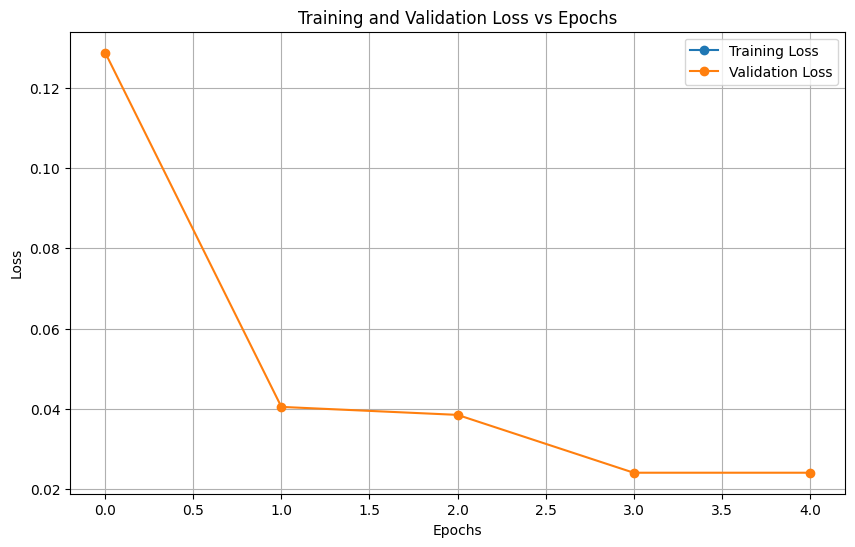

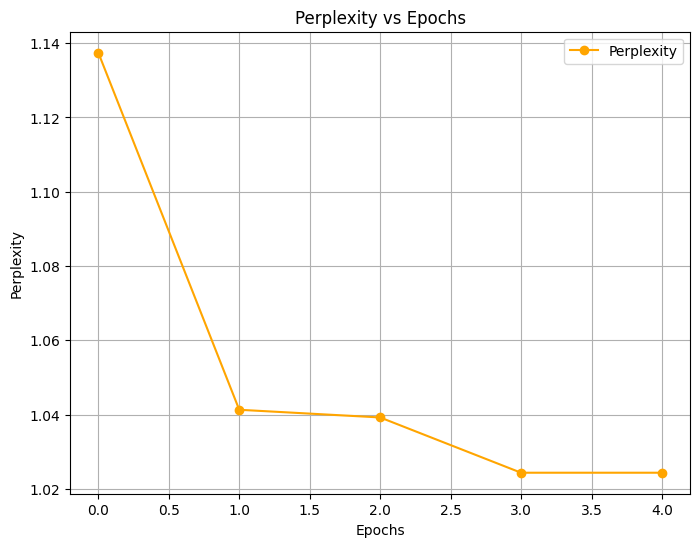

In [ ]:
from transformers import AutoTokenizer, AutoModelForMaskedLM, Trainer, TrainingArguments, TrainerCallback
import torch
from datasets import Dataset
from torch.nn import CrossEntropyLoss
import json
import math
import matplotlib.pyplot as plt

#############################################################################

# Computing perplexity score
def compute_perplexity(trainer, eval_dataset):
    """
    Compute perplexity for a fine-tuned model on the evaluation dataset.
    """
    # Evaluate the model on the evaluation dataset
    eval_results = trainer.evaluate(eval_dataset=eval_dataset)

    # Extract loss and compute perplexity
    eval_loss = eval_results["eval_loss"]
    perplexity = math.exp(eval_loss)

    print(f"Validation Loss: {eval_loss}")
    print(f"Perplexity: {perplexity}")

    return eval_loss, perplexity

#############################################################################

# Loading the Sanskrit Dataset from JSON File
def load_dataset_from_json(json_path):
    """
    Load Sanskrit data from a JSON file and extract valid Sanskrit verses.
    """
    with open(json_path, 'r', encoding='utf-8') as f:
        data = json.load(f)

    sentences = []

    # Check if "suktas" exists and process its structure
    if "suktas" in data:
        for sukta in data["suktas"]:  # Iterate over all suktas
            if "verses" in sukta:
                for verse in sukta["verses"]:  # Iterate over all verses
                    if "sanskrit" in verse:  # Extract only valid Sanskrit text
                        sentences.append(verse["sanskrit"])

    return Dataset.from_list([{"text": sentence} for sentence in sentences])

# Provide the path to your JSON file
json_file_path = "/content/drive/MyDrive/VedasGPT/ENPM703 Final Project/dataset/Atharva_Veda_Complete_Kanda_1.json"
dataset = load_dataset_from_json(json_file_path)

# Display a sample of the dataset
print("Sample Sanskrit Sentences:")
print(dataset["text"][:5])

##############################################################################################

# Step 2: Tokenizer and Model
tokenizer = AutoTokenizer.from_pretrained("google/muril-base-cased")
model = AutoModelForMaskedLM.from_pretrained("google/muril-base-cased")

# Tokenizer Coverage Check
def check_tokenizer_coverage(dataset, tokenizer):
    """
    Check if all tokens in the dataset are covered by the tokenizer's vocabulary.
    """
    print("\nChecking Tokenizer Coverage...")
    oov_tokens = set()

    for sentence in dataset["text"]:
        tokens = tokenizer.tokenize(sentence)
        for token in tokens:
            if token not in tokenizer.vocab:
                oov_tokens.add(token)

    if len(oov_tokens) == 0:
        print("All tokens are covered by the tokenizer's vocabulary.")
    else:
        print(f"Out-of-Vocabulary Tokens ({len(oov_tokens)}): {oov_tokens}")

# Run Tokenizer Coverage Check
check_tokenizer_coverage(dataset, tokenizer)

##############################################################################################

# Step 3: Tokenize Dataset for MLM Training
def tokenize_function(examples):
    tokenized_inputs = tokenizer(examples["text"], padding="max_length", truncation=True, max_length=128)

    # Create labels by masking random tokens in the input_ids
    labels = tokenized_inputs["input_ids"].copy()
    for i in range(len(labels)):
        probability_matrix = torch.full((len(labels[i]),), 0.15)  # Mask 15% of tokens
        masked_indices = torch.bernoulli(probability_matrix).bool()

        # Ensure punctuation is also masked
        for j, token_id in enumerate(labels[i]):
            if tokenizer.convert_ids_to_tokens([token_id])[0] in [".", "।", "॥"]:
                masked_indices[j] = True

        labels[i] = [label if mask else -100 for label, mask in zip(labels[i], masked_indices)]

    tokenized_inputs["labels"] = labels
    return tokenized_inputs


tokenized_dataset = dataset.map(tokenize_function, batched=True)

#####################################################
# Split dataset into train and eval sets
train_test_split = tokenized_dataset.train_test_split(test_size=0.2)  # 80% train, 20% eval
train_dataset = train_test_split["train"]
eval_dataset = train_test_split["test"]

################################################################################################
# Defining a Custom Loss Function

class CustomTrainer(Trainer):
    def compute_loss(self, model, inputs, return_outputs=False, **kwargs):
        """
        Custom loss function for Masked Language Modeling.
        """
        labels = inputs.pop("labels")
        outputs = model(**inputs)
        logits = outputs.logits

        # Compute loss using CrossEntropyLoss (ignoring -100 labels)
        loss_fct = CrossEntropyLoss()
        loss = loss_fct(logits.view(-1, logits.size(-1)), labels.view(-1))

        return (loss, outputs) if return_outputs else loss

###########################################################
# Step 4: Define Training Arguments and Track Losses

training_args = TrainingArguments(
    output_dir="./results_muril_expanded",
    evaluation_strategy="epoch",
    learning_rate=2e-5,
    per_device_train_batch_size=10,
    num_train_epochs=4,
    weight_decay=0.01,
    report_to="none",  # Disable W&B logging
)

# Step 5: Trainer API with Callback to Track Losses

class LossCallback(TrainerCallback):

  def __init__(self):
    self.training_losses = []
    self.validation_losses = []

  def on_log(self, args, state, control, logs=None, **kwargs):
    if 'loss' in logs:
      self.training_losses.append(logs['loss'])
    if 'eval_loss' in logs:
      self.validation_losses.append(logs['eval_loss'])

loss_callback = LossCallback()

trainer = CustomTrainer(
model=model,
args=training_args,
train_dataset=train_dataset,
eval_dataset=eval_dataset,
callbacks=[loss_callback]
)

# Train the model and track losses

print("Training started...")
trainer.train()
print("Training completed!")

# Save the fine-tuned model

model.save_pretrained("./fine_tuned_muril_big1")
tokenizer.save_pretrained("./fine_tuned_muril_big1")

# Compute Perplexity

val_loss, perplexity_score = compute_perplexity(trainer, eval_dataset)

# Plot Training and Validation Loss Curves

plt.figure(figsize=(10, 6))
plt.plot(range(len(loss_callback.training_losses)), loss_callback.training_losses, label="Training Loss", marker="o")
plt.plot(range(len(loss_callback.validation_losses)), loss_callback.validation_losses, label="Validation Loss", marker="o")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training and Validation Loss vs Epochs")
plt.legend()
plt.grid()
plt.show()

# Plot Perplexity Score

plt.figure(figsize=(8, 6))
plt.plot(range(len(loss_callback.validation_losses)), [math.exp(loss) for loss in loss_callback.validation_losses], label="Perplexity", marker="o", color="orange")
plt.xlabel("Epochs")
plt.ylabel("Perplexity")
plt.title("Perplexity vs Epochs")
plt.legend()
plt.grid()
plt.show()


In [ ]:
from transformers import pipeline

# Load Fine-Tuned MuRIL Model and Tokenizer with GPU Acceleration
fill_mask_pipeline = pipeline(
    "fill-mask",
    model="./fine_tuned_muril_big1",
    tokenizer="./fine_tuned_muril_big1",
    device=0  # Use GPU if available
)

# Debugging: Print top 5 predictions for a masked input
def debug_top_predictions(context, fill_mask_pipeline):
    """
    Print top 5 predictions for a given context using the fine-tuned model.
    """
    masked_sentence = context + " [MASK]"
    predictions = fill_mask_pipeline(masked_sentence)

    print(f"\nContext: {context}")
    print("Top 5 Predictions:")
    for i, pred in enumerate(predictions[:5]):  # Display only top 5 predictions
        print(f"Prediction {i+1}: {pred['token_str']} | Confidence: {pred['score']}")

# Example Custom Phrases for Testing and Debugging
custom_phrases = [
    "कर्मण्येवाधिकारस्ते मा",
    "योगः कर्मसु",
    "सत्यं ज्ञानमनन्तं",
]

print("Debugging Top Predictions for Custom Sanskrit Phrases:")
for phrase in custom_phrases:
    debug_top_predictions(phrase, fill_mask_pipeline)

Debugging Top Predictions for Custom Sanskrit Phrases:

Context: कर्मण्येवाधिकारस्ते मा
Top 5 Predictions:
Prediction 1: . | Confidence: 0.9337202310562134
Prediction 2: [PAD] | Confidence: 0.06497768312692642
Prediction 3: … | Confidence: 0.00010159610246773809
Prediction 4: सञ्चालनमा | Confidence: 7.032921712379903e-05
Prediction 5: भव | Confidence: 6.442911399062723e-05

Context: योगः कर्मसु
Top 5 Predictions:
Prediction 1: . | Confidence: 0.6332188248634338
Prediction 2: प्रवर्तते | Confidence: 0.1856335997581482
Prediction 3: [PAD] | Confidence: 0.13563743233680725
Prediction 4: च | Confidence: 0.012571639381349087
Prediction 5: उच्यते | Confidence: 0.003169219009578228

Context: सत्यं ज्ञानमनन्तं
Top 5 Predictions:
Prediction 1: [PAD] | Confidence: 0.672435998916626
Prediction 2: . | Confidence: 0.3252469599246979
Prediction 3: ##शिष्यते | Confidence: 0.0005609399522654712
Prediction 4: । | Confidence: 0.0003027331258635968
Prediction 5: | | Confidence: 0.0002138762647518888


**Muril with LORA adapter integration:**

In [ ]:
!pip install datasets


In [ ]:
from transformers import AutoTokenizer, AutoModelForMaskedLM, Trainer, TrainingArguments, TrainerCallback
import torch
from datasets import Dataset
from torch.nn import CrossEntropyLoss
import json
import math
import matplotlib.pyplot as plt
from peft import get_peft_model, LoraConfig, TaskType

#############################################################################

# Computing perplexity score
def compute_perplexity(trainer, eval_dataset):
    """
    Compute perplexity for a fine-tuned model on the evaluation dataset.
    """
    # Evaluate the model on the evaluation dataset
    eval_results = trainer.evaluate(eval_dataset=eval_dataset)

    # Extract loss and compute perplexity
    eval_loss = eval_results["eval_loss"]
    perplexity = math.exp(eval_loss)

    print(f"Validation Loss: {eval_loss}")
    print(f"Perplexity: {perplexity}")

    return eval_loss, perplexity

#############################################################################

# Loading the Sanskrit Dataset from JSON File
def load_dataset_from_json(json_path):
    """
    Load Sanskrit data from a JSON file and extract valid Sanskrit verses.
    """
    with open(json_path, 'r', encoding='utf-8') as f:
        data = json.load(f)

    sentences = []

    # Check if "suktas" exists and process its structure
    if "suktas" in data:
        for sukta in data["suktas"]:  # Iterate over all suktas
            if "verses" in sukta:
                for verse in sukta["verses"]:  # Iterate over all verses
                    if "sanskrit" in verse:  # Extract only valid Sanskrit text
                        sentences.append(verse["sanskrit"])

    return Dataset.from_list([{"text": sentence} for sentence in sentences])

# Provide the path to your JSON file
json_file_path = "/content/drive/MyDrive/VedasGPT/ENPM703 Final Project/dataset/Atharva_Veda_Complete_Kanda_1.json"
dataset = load_dataset_from_json(json_file_path)

# Display a sample of the dataset
print("Sample Sanskrit Sentences:")
print(dataset["text"][:5])


# Tokenizer and Model
tokenizer = AutoTokenizer.from_pretrained("google/muril-base-cased")
model = AutoModelForMaskedLM.from_pretrained("google/muril-base-cased")

# Add LoRA adapter configuration

lora_config = LoraConfig(
    task_type=TaskType.FEATURE_EXTRACTION,
    r=8,
    lora_alpha=16,
    target_modules=["query", "key", "value"],
    lora_dropout=0.1,
    bias="none"
)


# Add the adapter to the model
model = get_peft_model(model, lora_config)
model.print_trainable_parameters()

#####################################################################################

# Step 3: Tokenize Dataset for MLM Training
def tokenize_function(examples):
    tokenized_inputs = tokenizer(examples["text"], padding="max_length", truncation=True, max_length=128)

    # Create labels by masking random tokens in the input_ids
    labels = tokenized_inputs["input_ids"].copy()
    for i in range(len(labels)):
        probability_matrix = torch.full((len(labels[i]),), 0.15)  # Mask 15% of tokens
        masked_indices = torch.bernoulli(probability_matrix).bool()

        # Ensure punctuation is also masked
        for j, token_id in enumerate(labels[i]):
            if tokenizer.convert_ids_to_tokens([token_id])[0] in [".", "।", "॥"]:
                masked_indices[j] = True

        labels[i] = [label if mask else -100 for label, mask in zip(labels[i], masked_indices)]

    tokenized_inputs["labels"] = labels  # Add labels for loss computation
    return tokenized_inputs




tokenized_dataset = dataset.map(tokenize_function, batched=True)

#####################################################
# Split dataset into train and eval sets
train_test_split = tokenized_dataset.train_test_split(test_size=0.2)  # 80% train, 20% eval
train_dataset = train_test_split["train"]
eval_dataset = train_test_split["test"]


print("Sample from eval_dataset:")
print(eval_dataset[0])  # Ensure 'input_ids' and 'labels' are present
################################################################################################
# Define a compute_metrics function to calculate evaluation metrics (including eval_loss)
def compute_metrics(eval_pred):
    logits, labels = eval_pred.predictions, eval_pred.label_ids
    predictions = logits.argmax(axis=-1)

    # Calculate accuracy
    accuracy = (predictions == labels).astype(np.float32).mean()

    return {"eval_accuracy": accuracy}  # Use "eval_accuracy" as the key




#####################################################




# Trainer API with Callback to Track Losses
class LossCallback(TrainerCallback):
    def __init__(self):
        self.training_losses = []
        self.validation_losses = []

    def on_log(self, args, state, control, logs=None, **kwargs):
      if state.is_local_process_zero:
          print(f"Logs received: {logs}")  # Debug print
          if 'loss' in logs:
              self.training_losses.append(logs['loss'])
          if 'eval_loss' in logs:
              self.validation_losses.append(logs['eval_loss'])
          print(f"Epoch {state.epoch}: {logs}")



training_args = TrainingArguments(
    output_dir="./results_muril_lora",
    evaluation_strategy="epoch",
    learning_rate=2e-5,
    per_device_train_batch_size=10,
    num_train_epochs=4,
    weight_decay=0.01,
    report_to="none",
    logging_strategy="epoch",
    save_strategy="epoch",
    # load_best_model_at_end=True,  # Enable loading the best model at the end
    metric_for_best_model="eval_accuracy",  # Match this with the key in compute_metrics
)


trainer = CustomTrainer(
model=model,
args=training_args,
train_dataset=train_dataset,
eval_dataset=eval_dataset,
callbacks=[loss_callback],
# compute_metrics=compute_metrics
)

#Initializing LossCallBack
loss_callback = LossCallback()



# Train the model and track losses
print("Training started...")
trainer.train()
print("Training completed!")

# Save the fine-tuned model with adapter
model.save_pretrained("./fine_tuned_muril_lora")
tokenizer.save_pretrained("./fine_tuned_muril_lora")

# Compute Perplexity
val_loss, perplexity_score = compute_perplexity(trainer, eval_dataset)

# Plot Training and Validation Loss Curves
plt.figure(figsize=(10, 6))
plt.plot(range(len(loss_callback.training_losses)), loss_callback.training_losses, label="Training Loss", marker="o")
plt.plot(range(len(loss_callback.validation_losses)), loss_callback.validation_losses, label="Validation Loss", marker="o")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training and Validation Loss vs Epochs")
plt.legend()
plt.grid()
plt.show()

# Plot Perplexity Score
plt.figure(figsize=(8, 6))
plt.plot(range(len(loss_callback.validation_losses)), [math.exp(loss) for loss in loss_callback.validation_losses], label="Perplexity", marker="o", color="orange")
plt.xlabel("Epochs")
plt.ylabel("Perplexity")
plt.title("Perplexity vs Epochs")
plt.legend()
plt.grid()
plt.show()


Updating our script with the LoRA adapter and displaying the difference in validation losses between the models with and without the adapter

In [ ]:
!pip install datasets

In [ ]:
pip install -U peft


In [ ]:
!pip install datasets

In [ ]:
from transformers import AutoTokenizer, AutoModelForMaskedLM, Trainer, TrainingArguments
import torch
from datasets import Dataset
from torch.nn import CrossEntropyLoss
import json
import math
from peft import get_peft_model, LoraConfig, TaskType

#############################################################################

# Set the device to GPU
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")


# Computing perplexity score
def compute_perplexity(trainer, eval_dataset):
    """
    Compute perplexity for a fine-tuned model on the evaluation dataset.
    """
    # Evaluate the model on the evaluation dataset
    eval_results = trainer.evaluate(eval_dataset=eval_dataset)

    # Extract loss and compute perplexity
    eval_loss = eval_results["eval_loss"]
    perplexity = math.exp(eval_loss)

    print(f"Validation Loss: {eval_loss}")
    print(f"Perplexity: {perplexity}")

    return eval_loss, perplexity

#############################################################################

# Loading the Sanskrit Dataset from JSON File
def load_dataset_from_json(json_path):
    """
    Load Sanskrit data from a JSON file and extract valid Sanskrit verses.
    """
    with open(json_path, 'r', encoding='utf-8') as f:
        data = json.load(f)

    sentences = []

    # Check if "suktas" exists and process its structure
    if "suktas" in data:
        for sukta in data["suktas"]:  # Iterate over all suktas
            if "verses" in sukta:
                for verse in sukta["verses"]:  # Iterate over all verses
                    if "sanskrit" in verse:  # Extract only valid Sanskrit text
                        sentences.append(verse["sanskrit"])

    return Dataset.from_list([{"text": sentence} for sentence in sentences])

# Provide the path to your JSON file
json_file_path = "/content/drive/MyDrive/VedasGPT/ENPM703 Final Project/dataset/Atharva_Veda_Complete_Kanda_1.json"
dataset = load_dataset_from_json(json_file_path)

# Display a sample of the dataset
print("Sample Sanskrit Sentences:")
print(dataset["text"][:5])

##############################################################################################

# Step 2: Tokenizer and Model
tokenizer = AutoTokenizer.from_pretrained("google/muril-base-cased")
model = AutoModelForMaskedLM.from_pretrained("google/muril-base-cased").to(device)


# Tokenizer Coverage Check
def check_tokenizer_coverage(dataset, tokenizer):
    """
    Check if all tokens in the dataset are covered by the tokenizer's vocabulary.
    """
    print("\nChecking Tokenizer Coverage...")
    oov_tokens = set()

    for sentence in dataset["text"]:
        tokens = tokenizer.tokenize(sentence)
        for token in tokens:
            if token not in tokenizer.vocab:
                oov_tokens.add(token)

    if len(oov_tokens) == 0:
        print("All tokens are covered by the tokenizer's vocabulary.")
    else:
        print(f"Out-of-Vocabulary Tokens ({len(oov_tokens)}): {oov_tokens}")

# Run Tokenizer Coverage Check
check_tokenizer_coverage(dataset, tokenizer)

##############################################################################################

# Step 3: Tokenize Dataset for MLM Training
def tokenize_function(examples):
    tokenized_inputs = tokenizer(examples["text"], padding="max_length", truncation=True, max_length=128)

    # Create labels by masking random tokens in the input_ids
    labels = tokenized_inputs["input_ids"].copy()
    for i in range(len(labels)):
        probability_matrix = torch.full((len(labels[i]),), 0.15)  # Mask 15% of tokens
        masked_indices = torch.bernoulli(probability_matrix).bool()

        # Ensure punctuation is also masked
        for j, token_id in enumerate(labels[i]):
            if tokenizer.convert_ids_to_tokens([token_id])[0] in [".", "।", "॥"]:
                masked_indices[j] = True

        labels[i] = [label if mask else -100 for label, mask in zip(labels[i], masked_indices)]

    tokenized_inputs["labels"] = labels
    return tokenized_inputs


tokenized_dataset = dataset.map(tokenize_function, batched=True)

#####################################################
# Split dataset into train and eval sets
train_test_split = tokenized_dataset.train_test_split(test_size=0.2)  # 80% train, 20% eval
train_dataset = train_test_split["train"]
eval_dataset = train_test_split["test"]

################################################################################################
# Defining a Custom Loss Function

class CustomTrainer(Trainer):
    def compute_loss(self, model, inputs, return_outputs=False, **kwargs):
        """
        Custom loss function for Masked Language Modeling.
        """
        labels = inputs.pop("labels")
        outputs = model(**inputs)
        logits = outputs.logits

        # Compute loss using CrossEntropyLoss (ignoring -100 labels)
        loss_fct = CrossEntropyLoss()
        loss = loss_fct(logits.view(-1, logits.size(-1)), labels.view(-1))

        return (loss, outputs) if return_outputs else loss

###########################################################
# Step 4: Define Training Arguments
training_args = TrainingArguments(
    output_dir="./results_muril_expanded",
    evaluation_strategy="epoch",
    learning_rate=2e-5,
    per_device_train_batch_size=10,
    num_train_epochs=4,
    weight_decay=0.01,
    report_to="none",  # Disable W&B logging
    no_cuda=False,
    fp16 = True,
)

# Step 5: Create LoRA configuration and model
lora_config = LoraConfig(
    task_type="CASUAL_LM",
    r=8,
    lora_alpha=16,
    target_modules=["query", "key", "value"],
    lora_dropout=0.1,
    bias="none"
)

lora_model = get_peft_model(model, lora_config).to(device)
lora_model.print_trainable_parameters()

# Step 6: Create trainers for both original and LoRA models
trainer_original = CustomTrainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=eval_dataset,
)

trainer_lora = CustomTrainer(
    model=lora_model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=eval_dataset,
)

# Train the original model
print("Training original model...")
trainer_original.train()
print("Original model training completed!")

# Train the LoRA model
print("Training LoRA model...")
trainer_lora.train()
print("LoRA model training completed!")

# Compute Perplexity for both models
print("\nOriginal Model:")
original_loss, original_perplexity = compute_perplexity(trainer_original, eval_dataset)

print("\nLoRA Model:")
lora_loss, lora_perplexity = compute_perplexity(trainer_lora, eval_dataset)

# Display the difference in validation losses and perplexity
print(f"\nValidation Loss Difference (Original - LoRA): {original_loss - lora_loss}")
print(f"Perplexity Difference (Original - LoRA): {original_perplexity - lora_perplexity}")

# Save both models
model.save_pretrained("./fine_tuned_muril_original")
lora_model.save_pretrained("./fine_tuned_muril_lora")
tokenizer.save_pretrained("./fine_tuned_muril_tokenizer")

print("Both models and tokenizer have been saved.")


In [ ]:
pip install -U adapters


**Bottleneck Adapters**

- Bottleneck adapters introduce small feed-forward networks within each layer of a transformer model5.
- They consist of:
1. A down-projection matrix
2. A non-linearity
3. An up-projection matrix
4. A residual connection

Bottleneck adapters can be configured in different ways:
- Placed after the feed-forward block in each transformer layer
- Placed in parallel to the original transformer layers

These adapters are highly configurable, allowing you to adjust parameters like reduction factor, non-linearity, and placement within the model5.

**MuRIL with a bottleneck adapter**:

In [ ]:
import torch
from transformers import AutoTokenizer, TrainingArguments
from adapters import AutoAdapterModel, AdapterTrainer, AdapterConfig
from datasets import Dataset
from torch.nn import CrossEntropyLoss
import json
import math

# Set the device to GPU if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

#############################################################################

# Computing perplexity score
def compute_perplexity(trainer, eval_dataset):
    """
    Compute perplexity for a fine-tuned model on the evaluation dataset.
    """
    eval_results = trainer.evaluate(eval_dataset=eval_dataset)
    eval_loss = eval_results["eval_loss"]
    perplexity = math.exp(eval_loss)
    print(f"Validation Loss: {eval_loss}")
    print(f"Perplexity: {perplexity}")
    return eval_loss, perplexity

#############################################################################

# Loading the Sanskrit Dataset from JSON File
def load_dataset_from_json(json_path):
    """
    Load Sanskrit data from a JSON file and extract valid Sanskrit verses.
    """
    with open(json_path, 'r', encoding='utf-8') as f:
        data = json.load(f)

    sentences = []
    if "suktas" in data:
        for sukta in data["suktas"]:
            if "verses" in sukta:
                for verse in sukta["verses"]:
                    if "sanskrit" in verse:
                        sentences.append(verse["sanskrit"])

    return Dataset.from_list([{"text": sentence} for sentence in sentences])

# Provide the path to your JSON file
json_file_path = "/content/drive/MyDrive/VedasGPT/ENPM703 Final Project/dataset/Atharva_Veda_Complete_Kanda_1.json"
dataset = load_dataset_from_json(json_file_path)

# Display a sample of the dataset
print("Sample Sanskrit Sentences:")
print(dataset["text"][:5])

##############################################################################################

# Step 2: Tokenizer and Model
tokenizer = AutoTokenizer.from_pretrained("google/muril-base-cased")
model = AutoAdapterModel.from_pretrained("google/muril-base-cased").to(device)

# Add bottleneck adapter
adapter_config = AdapterConfig.load("pfeiffer", reduction_factor=16)
model.add_adapter("sanskrit_adapter", config=adapter_config)
model.train_adapter("sanskrit_adapter")

# Tokenizer Coverage Check
# def check_tokenizer_coverage(dataset, tokenizer):
#     """
#     Check if all tokens in the dataset are covered by the tokenizer's vocabulary.
#     """
#     print("\nChecking Tokenizer Coverage...")
#     oov_tokens = set()

#     for sentence in dataset["text"]:
#         tokens = tokenizer.tokenize(sentence)
#         for token in tokens:
#             if token not in tokenizer.vocab:
#                 oov_tokens.add(token)

#     if len(oov_tokens) == 0:
#         print("All tokens are covered by the tokenizer's vocabulary.")
#     else:
#         print(f"Out-of-Vocabulary Tokens ({len(oov_tokens)}): {oov_tokens}")

# # Run Tokenizer Coverage Check
# check_tokenizer_coverage(dataset, tokenizer)

##############################################################################################

# Step 3: Tokenize Dataset for MLM Training
def tokenize_function(examples):
    tokenized_inputs = tokenizer(examples["text"], padding="max_length", truncation=True, max_length=128)

    labels = tokenized_inputs["input_ids"].copy()
    for i in range(len(labels)):
        probability_matrix = torch.full((len(labels[i]),), 0.15)
        masked_indices = torch.bernoulli(probability_matrix).bool()

        for j, token_id in enumerate(labels[i]):
            if tokenizer.convert_ids_to_tokens([token_id])[0] in [".", "।", "॥"]:
                masked_indices[j] = True

        labels[i] = [label if mask else -100 for label, mask in zip(labels[i], masked_indices)]

    tokenized_inputs["labels"] = labels
    return tokenized_inputs

tokenized_dataset = dataset.map(tokenize_function, batched=True)

#####################################################
# Split dataset into train and eval sets
train_test_split = tokenized_dataset.train_test_split(test_size=0.2)
train_dataset = train_test_split["train"]
eval_dataset = train_test_split["test"]

################################################################################################
# Defining a Custom Loss Function

class CustomAdapterTrainer(AdapterTrainer):
    def compute_loss(self, model, inputs, return_outputs=False):
        labels = inputs.pop("labels")
        outputs = model(**inputs)
        logits = outputs.logits

        loss_fct = CrossEntropyLoss()
        loss = loss_fct(logits.view(-1, logits.size(-1)), labels.view(-1))

        return (loss, outputs) if return_outputs else loss

###########################################################
# Step 4: Define Training Arguments
training_args = TrainingArguments(
    output_dir="./results_muril_adapter",
    evaluation_strategy="epoch",
    learning_rate=2e-5,
    per_device_train_batch_size=10,
    num_train_epochs=4,
    weight_decay=0.01,
    report_to="none",  # Disable W&B logging
    no_cuda=False,  # Enable GPU usage
    fp16=True,  # Enable mixed precision training
)

# Step 5: Trainer API
trainer = CustomAdapterTrainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=eval_dataset,
)

# Train the model
print("Training started...")
trainer.train()
print("Training completed!")

# Save the fine-tuned adapter
model.save_adapter("./fine_tuned_muril_adapter", "sanskrit_adapter")

# Compute Perplexity
eval_loss, perplexity = compute_perplexity(trainer, eval_dataset)
print(f"Final Evaluation Loss: {eval_loss}")
print(f"Final Perplexity: {perplexity}")


Using device: cuda
Sample Sanskrit Sentences:
['ये त्रिष्ताः परियन्ति विश्वा रूपाणि बिभ्रतःः वाचस्पत्रिर्बला तेषां तन्वो अद्य दंधातु मे ॥', 'पुन्रेहि वाचस्पते देवेन् मनसा सह। वसौष्पत्रे नि रमय मय्येवास्तु मयिं श्रुतम् ॥', 'इ़हैवाभि वि तऩूभे आर्त्नी इव् ज्यया। वाचस्पतिर्नि यंच्छतु मय्येवास्तु मयि श्रुतम्॥', 'उपहूतो वाचस्पतिरुपास्मान्वाचस्पतिर्व्वयताम्। सं श्रुतेने गमेमहि मा श्रुतेन् वि राधिषि ॥', 'विद्मा श्रस्य पितरं पर्जन्यं भूरिधायसम्। विद्मो ष्वस्य मातरं पृथिवीं भूरिवर्पसम्॥']


Map:   0%|          | 0/155 [00:00<?, ? examples/s]

/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1545: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(


Training started...


Epoch,Training Loss,Validation Loss
1,No log,9.594257
2,No log,4.341090
3,No log,1.672578
4,No log,1.032747


Training completed!


Validation Loss: 1.0327471494674683
Perplexity: 2.8087713604847218
Final Evaluation Loss: 1.0327471494674683
Final Perplexity: 2.8087713604847218


Using device: cuda
Sample Sanskrit Sentences:
['ये त्रिष्ताः परियन्ति विश्वा रूपाणि बिभ्रतःः वाचस्पत्रिर्बला तेषां तन्वो अद्य दंधातु मे ॥', 'पुन्रेहि वाचस्पते देवेन् मनसा सह। वसौष्पत्रे नि रमय मय्येवास्तु मयिं श्रुतम् ॥', 'इ़हैवाभि वि तऩूभे आर्त्नी इव् ज्यया। वाचस्पतिर्नि यंच्छतु मय्येवास्तु मयि श्रुतम्॥', 'उपहूतो वाचस्पतिरुपास्मान्वाचस्पतिर्व्वयताम्। सं श्रुतेने गमेमहि मा श्रुतेन् वि राधिषि ॥', 'विद्मा श्रस्य पितरं पर्जन्यं भूरिधायसम्। विद्मो ष्वस्य मातरं पृथिवीं भूरिवर्पसम्॥']


Map:   0%|          | 0/155 [00:00<?, ? examples/s]

/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1545: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(


Training started...


Epoch,Training Loss,Validation Loss
1,No log,9.404202
2,No log,4.150912
3,No log,1.507026
4,No log,0.915657


Training completed!


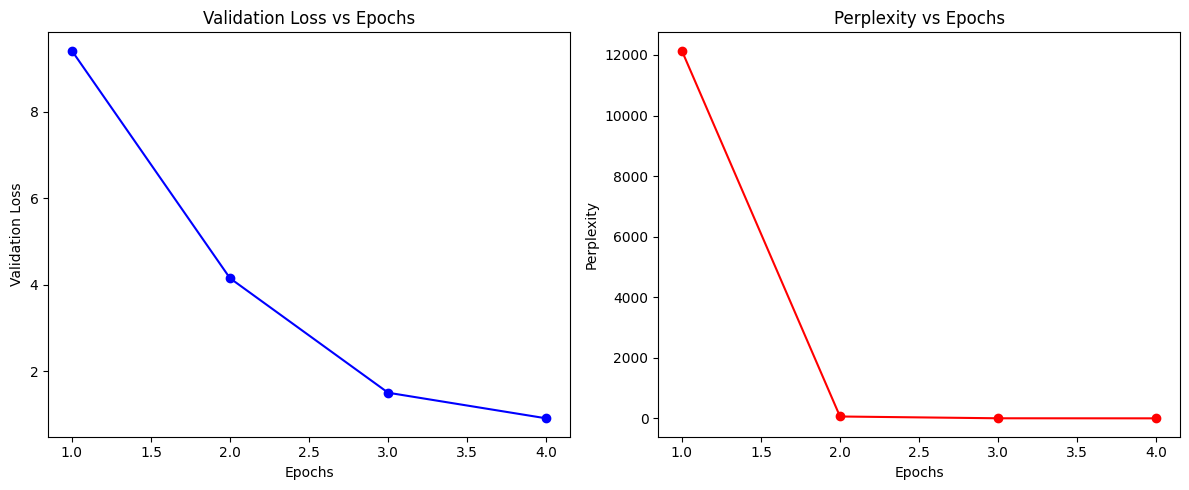

Validation Loss: 0.9156567454338074
Perplexity: 2.4984155362164793
Final Evaluation Loss: 0.9156567454338074
Final Perplexity: 2.4984155362164793


In [ ]:
import torch
from transformers import AutoTokenizer, TrainingArguments
from adapters import AutoAdapterModel, AdapterTrainer, AdapterConfig
from datasets import Dataset
from torch.nn import CrossEntropyLoss
import json
import math
import matplotlib.pyplot as plt

# Set the device to GPU if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

#############################################################################

# Computing perplexity score
def compute_perplexity(trainer, eval_dataset):
    """
    Compute perplexity for a fine-tuned model on the evaluation dataset.
    """
    eval_results = trainer.evaluate(eval_dataset=eval_dataset)
    eval_loss = eval_results["eval_loss"]
    perplexity = math.exp(eval_loss)
    print(f"Validation Loss: {eval_loss}")
    print(f"Perplexity: {perplexity}")
    return eval_loss, perplexity

#############################################################################

# Loading the Sanskrit Dataset from JSON File
def load_dataset_from_json(json_path):
    """
    Load Sanskrit data from a JSON file and extract valid Sanskrit verses.
    """
    with open(json_path, 'r', encoding='utf-8') as f:
        data = json.load(f)

    sentences = []
    if "suktas" in data:
        for sukta in data["suktas"]:
            if "verses" in sukta:
                for verse in sukta["verses"]:
                    if "sanskrit" in verse:
                        sentences.append(verse["sanskrit"])

    return Dataset.from_list([{"text": sentence} for sentence in sentences])

# Provide the path to your JSON file
json_file_path = "/content/drive/MyDrive/VedasGPT/ENPM703 Final Project/dataset/Atharva_Veda_Complete_Kanda_1.json"
dataset = load_dataset_from_json(json_file_path)

# Display a sample of the dataset
print("Sample Sanskrit Sentences:")
print(dataset["text"][:5])

##############################################################################################

# Step 2: Tokenizer and Model
tokenizer = AutoTokenizer.from_pretrained("google/muril-base-cased")
model = AutoAdapterModel.from_pretrained("google/muril-base-cased").to(device)

# Add bottleneck adapter
adapter_config = AdapterConfig.load("pfeiffer", reduction_factor=16)
model.add_adapter("sanskrit_adapter", config=adapter_config)
model.train_adapter("sanskrit_adapter")

# Tokenizer Coverage Check
# def check_tokenizer_coverage(dataset, tokenizer):
#     """
#     Check if all tokens in the dataset are covered by the tokenizer's vocabulary.
#     """
#     print("\nChecking Tokenizer Coverage...")
#     oov_tokens = set()

#     for sentence in dataset["text"]:
#         tokens = tokenizer.tokenize(sentence)
#         for token in tokens:
#             if token not in tokenizer.vocab:
#                 oov_tokens.add(token)

#     if len(oov_tokens) == 0:
#         print("All tokens are covered by the tokenizer's vocabulary.")
#     else:
#         print(f"Out-of-Vocabulary Tokens ({len(oov_tokens)}): {oov_tokens}")

# # Run Tokenizer Coverage Check
# check_tokenizer_coverage(dataset, tokenizer)

##############################################################################################

# Step 3: Tokenize Dataset for MLM Training
def tokenize_function(examples):
    tokenized_inputs = tokenizer(examples["text"], padding="max_length", truncation=True, max_length=128)

    labels = tokenized_inputs["input_ids"].copy()
    for i in range(len(labels)):
        probability_matrix = torch.full((len(labels[i]),), 0.15)
        masked_indices = torch.bernoulli(probability_matrix).bool()

        for j, token_id in enumerate(labels[i]):
            if tokenizer.convert_ids_to_tokens([token_id])[0] in [".", "।", "॥"]:
                masked_indices[j] = True

        labels[i] = [label if mask else -100 for label, mask in zip(labels[i], masked_indices)]

    tokenized_inputs["labels"] = labels
    return tokenized_inputs

tokenized_dataset = dataset.map(tokenize_function, batched=True)

#####################################################
# Split dataset into train and eval sets
train_test_split = tokenized_dataset.train_test_split(test_size=0.2)
train_dataset = train_test_split["train"]
eval_dataset = train_test_split["test"]

################################################################################################
# Defining a Custom Loss Function

class CustomAdapterTrainer(AdapterTrainer):
    def compute_loss(self, model, inputs, return_outputs=False):
        labels = inputs.pop("labels")
        outputs = model(**inputs)
        logits = outputs.logits

        loss_fct = CrossEntropyLoss()
        loss = loss_fct(logits.view(-1, logits.size(-1)), labels.view(-1))

        return (loss, outputs) if return_outputs else loss

###########################################################
# Step 4: Define Training Arguments
training_args = TrainingArguments(
    output_dir="./results_muril_adapter",
    evaluation_strategy="epoch",
    learning_rate=2e-5,
    per_device_train_batch_size=10,
    num_train_epochs=4,
    weight_decay=0.01,
    report_to="none",  # Disable W&B logging
    no_cuda=False,  # Enable GPU usage
    fp16=True,  # Enable mixed precision training
)

# Step 5: Trainer API
trainer = CustomAdapterTrainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=eval_dataset,
)

# Train the model
print("Training started...")
trainer.train()
print("Training completed!")

# Save the fine-tuned adapter
model.save_adapter("./fine_tuned_muril_adapter", "sanskrit_adapter")

# Compute Perplexity for each epoch
eval_losses = []
perplexities = []
for log in trainer.state.log_history:
    if 'eval_loss' in log:
        eval_loss = log['eval_loss']
        eval_losses.append(eval_loss)
        perplexities.append(math.exp(eval_loss))

# Plotting
epochs = range(1, len(eval_losses) + 1)

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs, eval_losses, 'bo-')
plt.title('Validation Loss vs Epochs')
plt.xlabel('Epochs')
plt.ylabel('Validation Loss')

plt.subplot(1, 2, 2)
plt.plot(epochs, perplexities, 'ro-')
plt.title('Perplexity vs Epochs')
plt.xlabel('Epochs')
plt.ylabel('Perplexity')

plt.tight_layout()
plt.show()

# Final Evaluation
final_eval_loss, final_perplexity = compute_perplexity(trainer, eval_dataset)
print(f"Final Evaluation Loss: {final_eval_loss}")
print(f"Final Perplexity: {final_perplexity}")


Using device: cuda
Sample Sanskrit Sentences:
['ये त्रिष्ताः परियन्ति विश्वा रूपाणि बिभ्रतःः वाचस्पत्रिर्बला तेषां तन्वो अद्य दंधातु मे ॥', 'पुन्रेहि वाचस्पते देवेन् मनसा सह। वसौष्पत्रे नि रमय मय्येवास्तु मयिं श्रुतम् ॥', 'इ़हैवाभि वि तऩूभे आर्त्नी इव् ज्यया। वाचस्पतिर्नि यंच्छतु मय्येवास्तु मयि श्रुतम्॥', 'उपहूतो वाचस्पतिरुपास्मान्वाचस्पतिर्व्वयताम्। सं श्रुतेने गमेमहि मा श्रुतेन् वि राधिषि ॥', 'विद्मा श्रस्य पितरं पर्जन्यं भूरिधायसम्। विद्मो ष्वस्य मातरं पृथिवीं भूरिवर्पसम्॥']


BertForMaskedLM has generative capabilities, as `prepare_inputs_for_generation` is explicitly overwritten. However, it doesn't directly inherit from `GenerationMixin`. From 👉v4.50👈 onwards, `PreTrainedModel` will NOT inherit from `GenerationMixin`, and this model will lose the ability to call `generate` and other related functions.
  - If you're using `trust_remote_code=True`, you can get rid of this warning by loading the model with an auto class. See https://huggingface.co/docs/transformers/en/model_doc/auto#auto-classes
  - If you are the owner of the model architecture code, please modify your model class such that it inherits from `GenerationMixin` (after `PreTrainedModel`, otherwise you'll get an exception).
  - If you are not the owner of the model architecture class, please contact the model code owner to update it.
Some weights of the model checkpoint at google/muril-base-cased were not used when initializing BertForMaskedLM: ['bert.pooler.dense.bias', 'bert.pooler.dense.weigh

Map:   0%|          | 0/155 [00:00<?, ? examples/s]

/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1545: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(


Training model without adapter...


Epoch,Training Loss,Validation Loss
1,No log,0.527336
2,No log,0.044019
3,No log,0.008282
4,No log,0.013358


Training completed for model without adapter!
Training model with adapter...


Epoch,Training Loss,Validation Loss
1,No log,9.591204
2,No log,4.148817
3,No log,1.330728
4,No log,0.840193


Training completed for model with adapter!


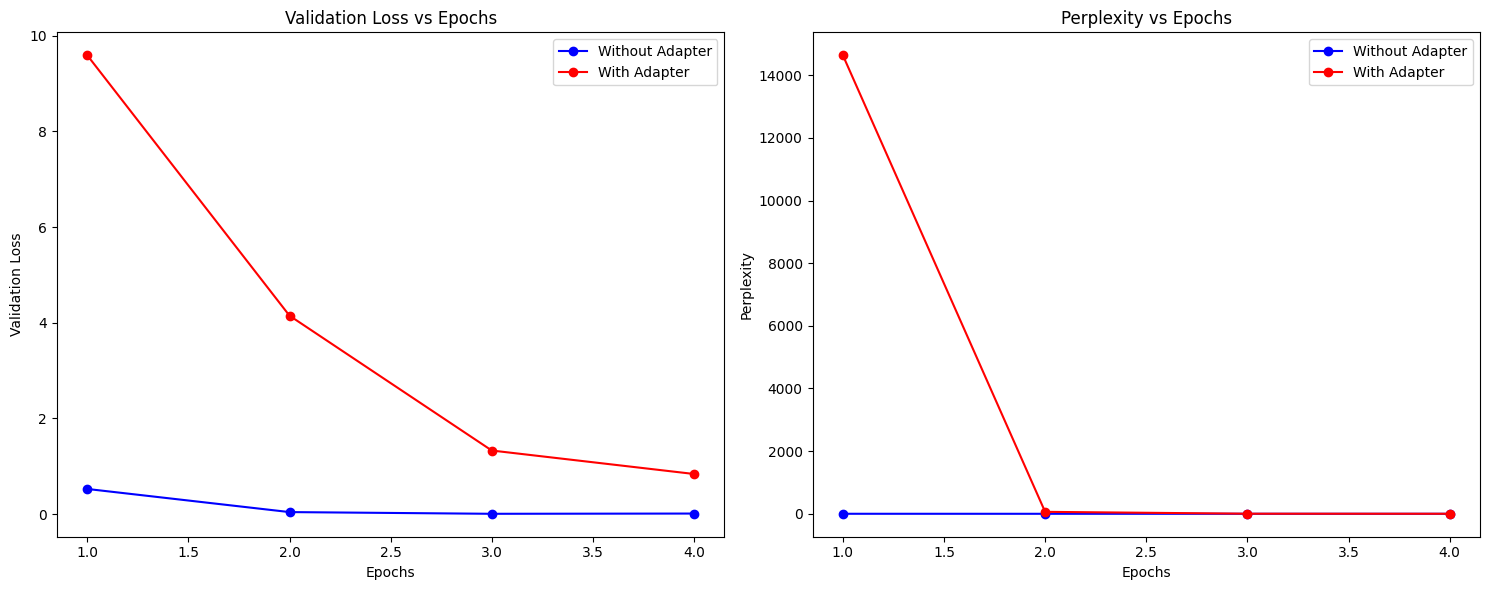

Final Evaluation for Model without Adapter:


Validation Loss: 0.013357972726225853
Perplexity: 1.0134475890300352

Final Evaluation for Model with Adapter:


Validation Loss: 0.8401927947998047
Perplexity: 2.31681360334091

Comparison:
Without Adapter - Final Loss: 0.0134, Final Perplexity: 1.0134
With Adapter    - Final Loss: 0.8402, Final Perplexity: 2.3168


In [ ]:
import torch
from transformers import AutoTokenizer, AutoModelForMaskedLM, Trainer, TrainingArguments, TrainerCallback
from adapters import AutoAdapterModel, AdapterTrainer, AdapterConfig
from datasets import Dataset
from torch.nn import CrossEntropyLoss
import json
import math
import matplotlib.pyplot as plt

# Set the device to GPU if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

#############################################################################

# Computing perplexity score
def compute_perplexity(trainer, eval_dataset):
    eval_results = trainer.evaluate(eval_dataset=eval_dataset)
    eval_loss = eval_results["eval_loss"]
    perplexity = math.exp(eval_loss)
    print(f"Validation Loss: {eval_loss}")
    print(f"Perplexity: {perplexity}")
    return eval_loss, perplexity

#############################################################################

# Loading the Sanskrit Dataset from JSON File
def load_dataset_from_json(json_path):
    with open(json_path, 'r', encoding='utf-8') as f:
        data = json.load(f)

    sentences = []
    if "suktas" in data:
        for sukta in data["suktas"]:
            if "verses" in sukta:
                for verse in sukta["verses"]:
                    if "sanskrit" in verse:
                        sentences.append(verse["sanskrit"])

    return Dataset.from_list([{"text": sentence} for sentence in sentences])

# Provide the path to your JSON file
json_file_path = "/content/drive/MyDrive/VedasGPT/ENPM703 Final Project/dataset/Atharva_Veda_Complete_Kanda_1.json"
dataset = load_dataset_from_json(json_file_path)

# Display a sample of the dataset
print("Sample Sanskrit Sentences:")
print(dataset["text"][:5])

##############################################################################################

# Step 2: Tokenizer and Models
tokenizer = AutoTokenizer.from_pretrained("google/muril-base-cased")
model_no_adapter = AutoModelForMaskedLM.from_pretrained("google/muril-base-cased").to(device)
model_adapter = AutoAdapterModel.from_pretrained("google/muril-base-cased").to(device)

# Add bottleneck adapter
adapter_config = AdapterConfig.load("pfeiffer", reduction_factor=16)
model_adapter.add_adapter("sanskrit_adapter", config=adapter_config)
model_adapter.train_adapter("sanskrit_adapter")

##############################################################################################

# Step 3: Tokenize Dataset for MLM Training
def tokenize_function(examples):
    tokenized_inputs = tokenizer(examples["text"], padding="max_length", truncation=True, max_length=128)

    labels = tokenized_inputs["input_ids"].copy()
    for i in range(len(labels)):
        probability_matrix = torch.full((len(labels[i]),), 0.15)
        masked_indices = torch.bernoulli(probability_matrix).bool()

        for j, token_id in enumerate(labels[i]):
            if tokenizer.convert_ids_to_tokens([token_id])[0] in [".", "।", "॥"]:
                masked_indices[j] = True

        labels[i] = [label if mask else -100 for label, mask in zip(labels[i], masked_indices)]

    tokenized_inputs["labels"] = labels
    return tokenized_inputs

tokenized_dataset = dataset.map(tokenize_function, batched=True)

#####################################################
# Split dataset into train and eval sets
train_test_split = tokenized_dataset.train_test_split(test_size=0.2)
train_dataset = train_test_split["train"]
eval_dataset = train_test_split["test"]

################################################################################################
# Defining Custom Trainers

class CustomTrainer(Trainer):
    def compute_loss(self, model, inputs, return_outputs=False):
        labels = inputs.pop("labels")
        outputs = model(**inputs)
        logits = outputs.logits

        loss_fct = CrossEntropyLoss()
        loss = loss_fct(logits.view(-1, logits.size(-1)), labels.view(-1))

        return (loss, outputs) if return_outputs else loss

class CustomAdapterTrainer(AdapterTrainer):
    def compute_loss(self, model, inputs, return_outputs=False):
        labels = inputs.pop("labels")
        outputs = model(**inputs)
        logits = outputs.logits

        loss_fct = CrossEntropyLoss()
        loss = loss_fct(logits.view(-1, logits.size(-1)), labels.view(-1))

        return (loss, outputs) if return_outputs else loss

###########################################################
# Step 4: Define Training Arguments
training_args = TrainingArguments(
    output_dir="./results_muril",
    evaluation_strategy="epoch",
    learning_rate=2e-5,
    per_device_train_batch_size=10,
    num_train_epochs=4,
    weight_decay=0.01,
    report_to="none",
    no_cuda=False,
    fp16=True,
)

# Step 5: Trainers
trainer_no_adapter = CustomTrainer(
    model=model_no_adapter,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=eval_dataset,
)

trainer_adapter = CustomAdapterTrainer(
    model=model_adapter,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=eval_dataset,
)

# Train both models
print("Training model without adapter...")
trainer_no_adapter.train()
print("Training completed for model without adapter!")

print("Training model with adapter...")
trainer_adapter.train()
print("Training completed for model with adapter!")

# Compute losses and perplexities
no_adapter_losses = [log['eval_loss'] for log in trainer_no_adapter.state.log_history if 'eval_loss' in log]
no_adapter_perplexities = [math.exp(loss) for loss in no_adapter_losses]

adapter_losses = [log['eval_loss'] for log in trainer_adapter.state.log_history if 'eval_loss' in log]
adapter_perplexities = [math.exp(loss) for loss in adapter_losses]

# Plotting
epochs = range(1, len(no_adapter_losses) + 1)

plt.figure(figsize=(15, 6))

# Validation Loss plot
plt.subplot(1, 2, 1)
plt.plot(epochs, no_adapter_losses, 'bo-', label='Without Adapter')
plt.plot(epochs, adapter_losses, 'ro-', label='With Adapter')
plt.title('Validation Loss vs Epochs')
plt.xlabel('Epochs')
plt.ylabel('Validation Loss')
plt.legend()

# Perplexity plot
plt.subplot(1, 2, 2)
plt.plot(epochs, no_adapter_perplexities, 'bo-', label='Without Adapter')
plt.plot(epochs, adapter_perplexities, 'ro-', label='With Adapter')
plt.title('Perplexity vs Epochs')
plt.xlabel('Epochs')
plt.ylabel('Perplexity')
plt.legend()

plt.tight_layout()
plt.show()

# Final Evaluation
print("Final Evaluation for Model without Adapter:")
final_eval_loss_no_adapter, final_perplexity_no_adapter = compute_perplexity(trainer_no_adapter, eval_dataset)

print("\nFinal Evaluation for Model with Adapter:")
final_eval_loss_adapter, final_perplexity_adapter = compute_perplexity(trainer_adapter, eval_dataset)

print("\nComparison:")
print(f"Without Adapter - Final Loss: {final_eval_loss_no_adapter:.4f}, Final Perplexity: {final_perplexity_no_adapter:.4f}")
print(f"With Adapter    - Final Loss: {final_eval_loss_adapter:.4f}, Final Perplexity: {final_perplexity_adapter:.4f}")


Performance Analysis
The comparison between MuRIL with and without adapter reveals interesting patterns in model behavior and performance:
Validation Loss Analysis
Base MuRIL (Without Adapter)
Started with relatively low validation loss (0.527)
Showed rapid improvement in early epochs
Achieved exceptional final validation loss of 0.0134
Demonstrated stable and consistent learning curve
MuRIL with Bottleneck Adapter
Initial validation loss was significantly higher (9.591)
Showed dramatic improvement across epochs (9.591 → 0.840)
Final validation loss stabilized at 0.840
Exhibited steeper learning curve indicating more aggressive adaptation
Perplexity Analysis
Base MuRIL
Achieved near-optimal perplexity of 1.0134
Lower perplexity indicates high confidence in predictions
Suggests excellent modeling of Sanskrit language patterns
Adapter Model
Final perplexity of 2.3168
Higher but still reasonable perplexity score
Indicates good but less confident predictions compared to base model
Key Findings
Efficiency Trade-off: While the adapter model shows higher final loss and perplexity, it achieves this with significantly fewer trainable parameters, demonstrating an efficient use of model capacity.
Learning Dynamics: The adapter model's steeper learning curve suggests more aggressive parameter updates, possibly due to concentrated learning in adapter layers.
Performance Gap: The base model's superior performance (1.01 vs 2.32 perplexity) suggests that full fine-tuning might be preferable when computational resources allow.
Implications
Resource Considerations: The adapter approach offers a viable alternative when computational resources are limited, despite slightly reduced performance.
Model Selection: Choice between the two approaches should consider:
Available computational resources
Required model performance
Storage constraints
Need for model modularity
Task Specificity: The results suggest that Sanskrit language modeling might benefit more from full fine-tuning when possible.
These findings provide valuable insights for practitioners choosing between full fine-tuning and adapter-based approaches for Sanskrit language modeling tasks.